In [2]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=dba2abfc7ed790645aafc065ff21c1b4d67348554eb05a5b5ac802e843317211
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 76.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 14.6 MB/s eta 0:00:00


In [4]:
!pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.7/229.7 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.8/300.8 kB 7.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 4.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 14.2 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.48.1-py3-none-any.whl size=315012 sha256=667af0c4614e2785de3634ffd9e0aa5d837dc

In [5]:
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 49.5 MB/s eta 0:00:00


In [6]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="f8e1675886ab4ab301abe1a5c53d28716606ab666c9454f2b770911d50be046a9c75d80ab79a5ee5d07f93ef2e20f2571c07fe260c780cf44e3d6cb3573a6603", set_as_default=True, overwrite=True)

# Load saved credentials, initialize account
service = QiskitRuntimeService()

In [16]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Create empty circuit
example_circuit = QuantumCircuit(2) # Create a Quantum Circuit with 2 registers (qubits) with both state 0
example_circuit.measure_all() # Adds measurement to all qubits.
example_circuit.draw("mpl").savefig("test.svg")
# example_circuit.draw("mpl", filename='./name.svg')

In [12]:
!pwd

/content


In [17]:
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.backend("ibmq_qasm_simulator")
job = Sampler(backend).run(example_circuit)
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: cm69hqu879ps6bbn0nvg
SamplerResult(quasi_dists=[{0: 1.0}], metadata=[{'shots': 4000, 'circuit_metadata': {}}])


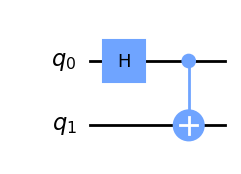

In [18]:
from qiskit import QuantumCircuit
from pylatexenc import *

# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.

qc.draw("mpl")

In [19]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ') # create the two-qubit Pauli operator: Z on qubit 1 and Z on qubit 2.
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')
# If the state is entangled, then the correlation between qubit 1 and qubit 2 is one.

In [20]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService()

# Run on the least-busy backend you have access to
# backend = service.least_busy(simulator=False, operational=True)
backend = service.backend("ibmq_qasm_simulator")

options = Options()
options.resilience_level = 1 # resilience_level 1: Mitigate error associated with readout errors
options.optimization_level = 3 # Higher levels generate more optimized circuits, at the expense of longer compile times.

# Create an Estimator object
estimator = Estimator(backend, options=options) # service estimating expectation values of quantum circuits and observables.

# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)

# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([ 0.02036741,  0.00878594, -0.01916933,  0.01038339,  1.        ,
        1.        ]), metadata=[{'variance': 0.999585168522696, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9999228072145271, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9996325368228726, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.9998921852830998, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192, 'warning': 'Optimization level clipped from 3 to 1'}, {'variance': 0.0, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitig

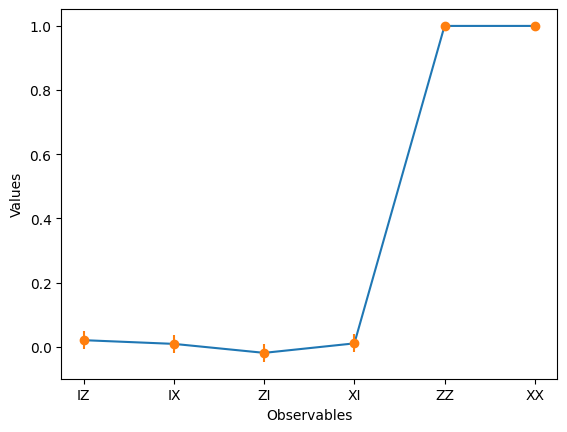

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# data
data = ['IZ', 'IX', 'ZI', 'XI', 'ZZ', 'XX']
values = job.result().values

# creating error bars
error = []
for case in job.result().metadata:
    error.append(2*np.sqrt(case['variance']/case['shots']))

# plotting graph
plt.plot(data, values)
plt.errorbar(data, values, yerr = error, fmt ='o')
plt.xlabel('Observables')
plt.ylabel('Values')
plt.show()

### repetition codes

In [22]:
# Qiskit imports
from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.result import marginal_counts

# Qiskit IBM Provider
from qiskit_ibm_provider import IBMProvider, least_busy

import warnings
warnings.filterwarnings("ignore")

In [23]:
provider = IBMProvider() # Provides access to the IBM Quantum services
# backend = least_busy(provider.backends(simulator=False, operational=True))
backend = service.backend("ibmq_qasm_simulator")
# backend = service.backend("ibm_brisbane")
# backend = service.backend("ibm_osaka")
backend

<IBMBackend('ibmq_qasm_simulator')>

In [82]:
qreg_measure = QuantumRegister(2, name="syn_q")
qreg_data = QuantumRegister(3, name="q")
creg_syndrome = ClassicalRegister(2, name="syn_c")
creg_data = ClassicalRegister(3, name="c")
state_data = qreg_data[0]
ancillas_data = qreg_data[1:]

def build_qc():
    """Build a typical error correction circuit"""
    return QuantumCircuit(qreg_measure, qreg_data, creg_syndrome, creg_data)

def initialize_qubits(circuit: QuantumCircuit):
    """Initialize qubit to |1>"""
    circuit.x(qreg_data[0])
    # circuit.barrier(qreg_data) # A barrier is a visual indicator of the grouping of a circuit section.
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def encode_bit_flip(circuit, state, ancillas) -> QuantumCircuit: # -> is a return value annotation
    """Encode bit-flip. This is done by simply adding a cx"""
    for ancilla in ancillas:
        circuit.cx(state, ancilla)
    # circuit.barrier(state, *ancillas)
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_measure):
    """
        Measure the syndrome by measuring the parity.
        We reset our ancilla qubits after measuring the stabilizer
        so we can reuse them for repeated stabilizer measurements.
        Because we have already observed the state of the qubit,
        we can write the conditional reset protocol directly to
        avoid another round of qubit measurement if we used
        the `reset` instruction.
    """
    circuit.barrier(*qreg_data, *qreg_measure)
    circuit.cx(qreg_data[0], qreg_measure[0])
    circuit.cx(qreg_data[1], qreg_measure[0])
    circuit.cx(qreg_data[0], qreg_measure[1])
    circuit.cx(qreg_data[2], qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure) # * can pass arbitrary number argument
    circuit.measure(qreg_measure, creg_measure)
    # with circuit.if_test((creg_syndrome[0], 1)): # reset the ancilla bit
    #     circuit.x(qreg_measure[0])
    # with circuit.if_test((creg_syndrome[1], 1)):
    #     circuit.x(qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def apply_correction_bit(circuit, qreg_data, creg_syndrome):
    """We can detect where an error occurred and correct our state"""
    circuit.x(qreg_data[0]).c_if(creg_syndrome, 3)
    circuit.x(qreg_data[1]).c_if(creg_syndrome, 1)
    circuit.x(qreg_data[2]).c_if(creg_syndrome, 2)
    # with circuit.if_test((creg_syndrome, 3)):
    #     circuit.x(qreg_data[0]).c_if(creg_syndrome, 3)
    # with circuit.if_test((creg_syndrome, 1)):
    #     circuit.x(qreg_data[1])
    # with circuit.if_test((creg_syndrome, 2)):
    #     circuit.x(qreg_data[2])
    # circuit.barrier(qreg_data)
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def apply_final_readout(circuit, qreg_data, creg_data):
    """Read out the final measurements"""
    # circuit.barrier(qreg_data)
    circuit.measure(qreg_data, creg_data)
    return circuit

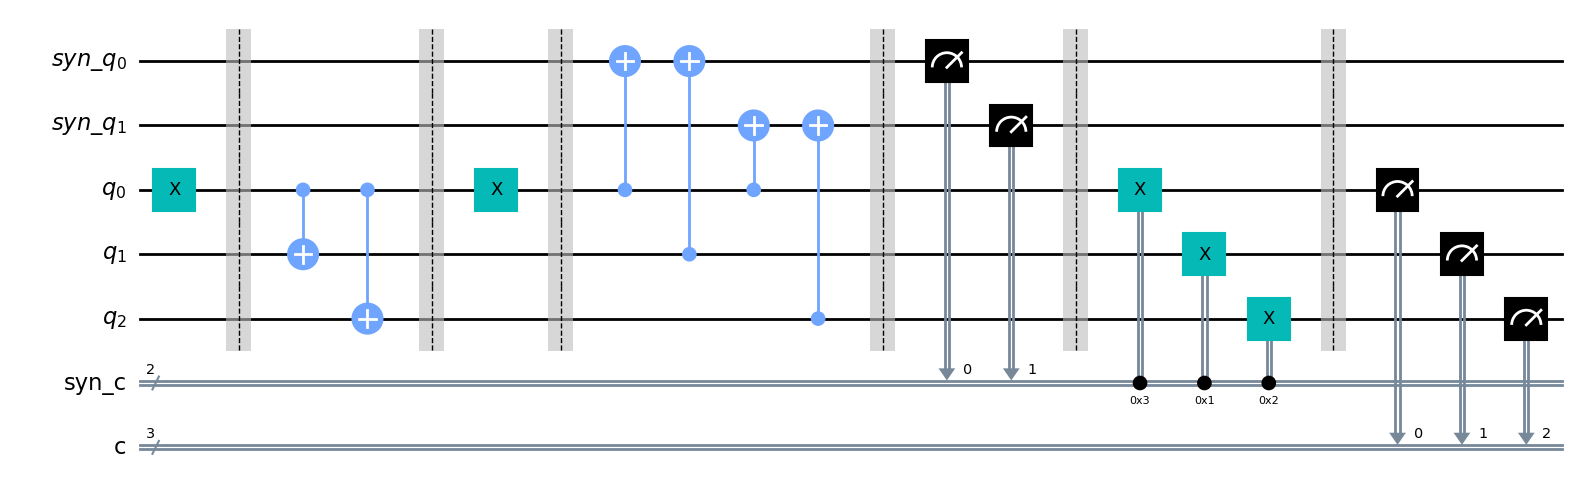

In [98]:
def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit.x(qreg_data[0])
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=True)
# circuit.draw(output="mpl", style='iqp')
# circuit.draw(output="mpl").savefig("Circuit: Bit Flip Code.svg")
circuit.draw(output="mpl")

In [26]:
from qiskit.circuit import IfElseOp

if "if_else" not in backend.target:
    backend.target.add_instruction(IfElseOp, name="if_else")

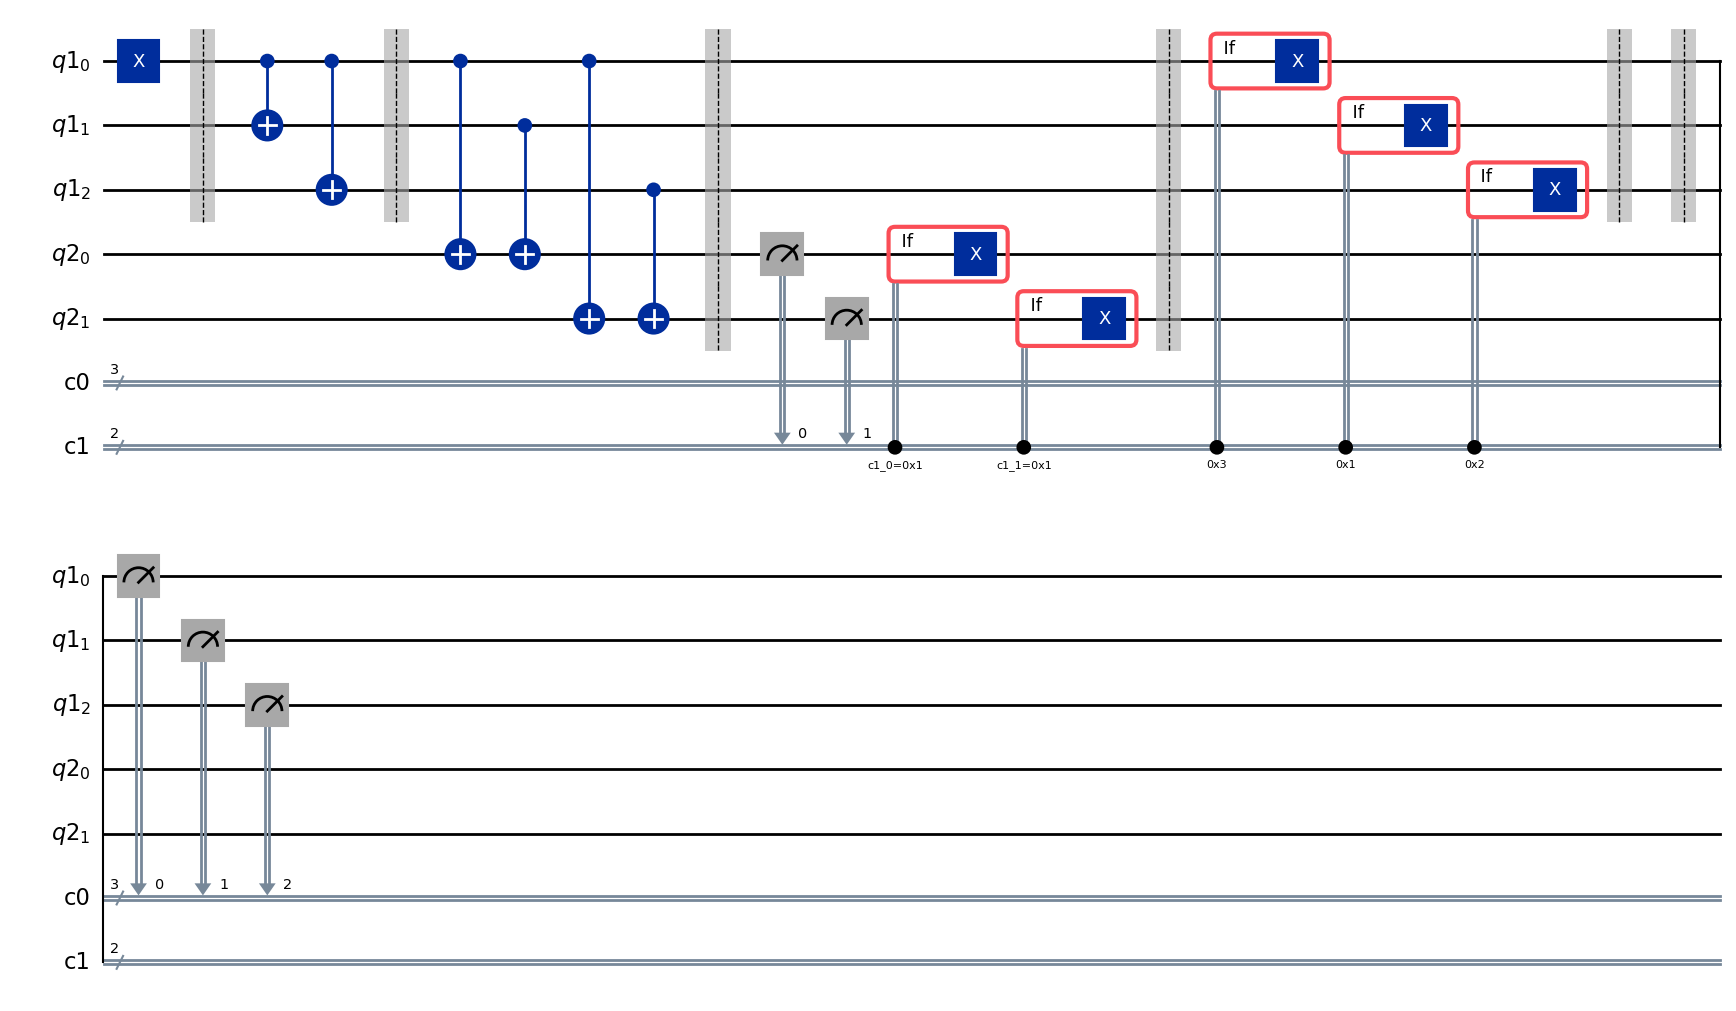

In [27]:
transpiled_circuit = transpile(circuit, backend) # select the best qubit layout and routing # basis gate set
# transpiled_circuit = circuit
transpiled_circuit.draw(output="mpl", style='iqp', idle_wires=False)

In [28]:
no_correction_circuit = build_error_correction_sequence(apply_correction=False)
transpiled_no_correction_circuit = transpile(no_correction_circuit, backend)
# transpiled_no_correction_circuit = no_correction_circuit

In [29]:
job_with_correction = backend.run(transpiled_circuit, shots=500, dynamic=True)
result_with_correction = job_with_correction.result()

In [30]:
job_no_correction = backend.run(transpiled_no_correction_circuit, shots=500, dynamic=True)
result_no_correction = job_no_correction.result()

In [31]:
data_indices = list(range(len(qreg_data)))
syndrome_indices = list(range(data_indices[-1]+1, len(qreg_data) + len(qreg_measure) ))

def decode_result(data_counts, syndrome_counts):
    shots = sum(data_counts.values())
    success_trials = data_counts.get('000', 0) + data_counts.get('111', 0)
    failed_trials = shots-success_trials
    error_correction_events = shots-syndrome_counts.get('00', 0)
    print(f"Bit flip errors were detected/corrected on {error_correction_events}/{shots} trials")
    print(f"A final parity error was detected on {failed_trials}/{shots} trials")

In [32]:
non_corrected_marginalized_data_result = marginal_counts(result_no_correction, data_indices)
non_corrected_marginalized_syndrome_result = marginal_counts(result_no_correction, syndrome_indices)

print(f'Completed bit code experiment data measurement counts {non_corrected_marginalized_data_result.get_counts(0)}')
print(f'Completed bit code experiment syndrome measurement counts {non_corrected_marginalized_syndrome_result.get_counts(0)}')
decode_result(non_corrected_marginalized_data_result.get_counts(0), non_corrected_marginalized_syndrome_result.get_counts(0))

Completed bit code experiment data measurement counts {'111': 500}
Completed bit code experiment syndrome measurement counts {'00': 500}
Bit flip errors were detected/corrected on 0/500 trials
A final parity error was detected on 0/500 trials


In [33]:
corrected_marginalized_data_result = marginal_counts(result_with_correction, data_indices)
corrected_marginalized_syndrome_result = marginal_counts(result_with_correction, syndrome_indices)

print(f'Completed bit code experiment data measurement counts {corrected_marginalized_data_result.get_counts(0)}')
print(f'Completed bit code experiment syndrome measurement counts {corrected_marginalized_syndrome_result.get_counts(0)}')
decode_result(corrected_marginalized_data_result.get_counts(0), corrected_marginalized_syndrome_result.get_counts(0))

Completed bit code experiment data measurement counts {'111': 500}
Completed bit code experiment syndrome measurement counts {'00': 500}
Bit flip errors were detected/corrected on 0/500 trials
A final parity error was detected on 0/500 trials


### Noise Simulation

In [34]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error)

In [35]:
import qiskit
from qiskit_aer import AerSimulator

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = qiskit.execute(circ, aersim).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)
# Counts(ideal): {'000': 493, '111': 531}

Counts(ideal): {'111': 533, '000': 491}


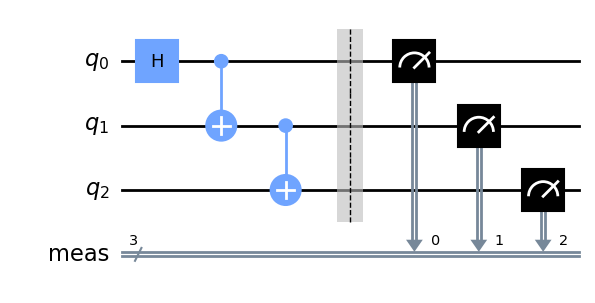

In [36]:
# circ.draw(output="mpl", style='iqp')
circ.draw("mpl")

In [37]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

In [38]:
from qiskit.providers.fake_provider import FakeVigo
device_backend = FakeVigo()

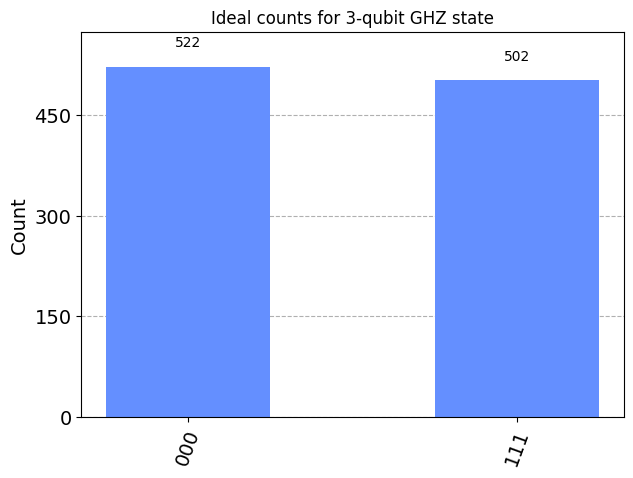

In [39]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [40]:
sim_vigo = AerSimulator.from_backend(device_backend)

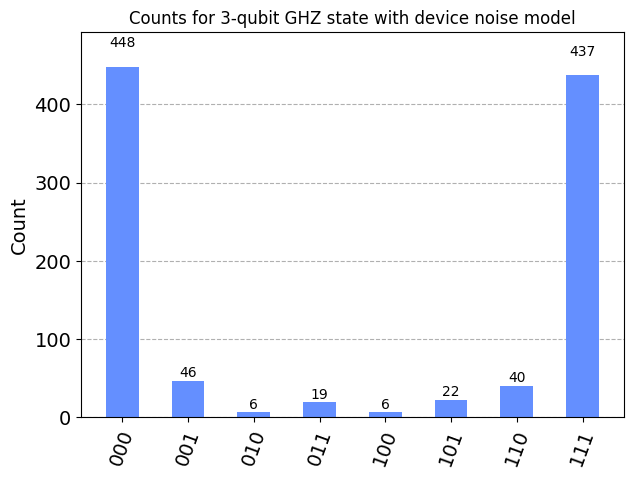

In [41]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

### Repetition code on Aer

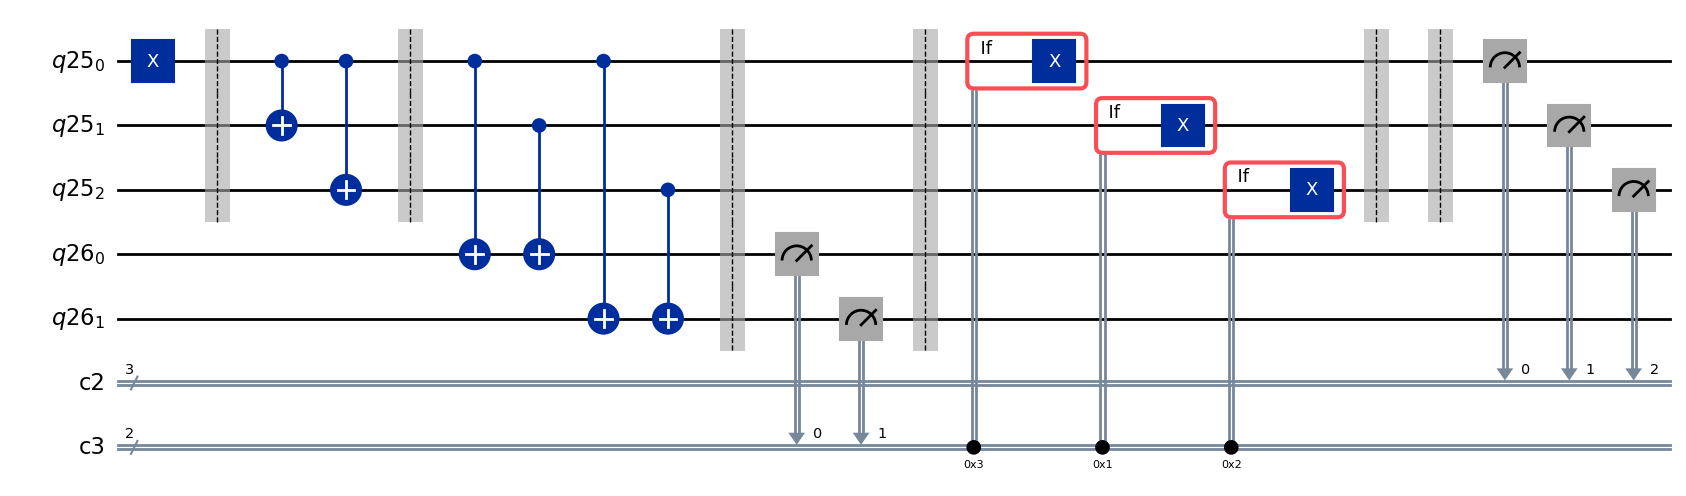

In [42]:
qreg_data = QuantumRegister(3)
qreg_measure = QuantumRegister(2)
creg_data = ClassicalRegister(3)
creg_syndrome = ClassicalRegister(2)
state_data = qreg_data[0]
ancillas_data = qreg_data[1:]

def build_qc():
    """Build a typical error correction circuit"""
    return QuantumCircuit(qreg_data, qreg_measure, creg_data, creg_syndrome)

def initialize_qubits(circuit: QuantumCircuit):
    """Initialize qubit to |1>"""
    circuit.x(qreg_data[0])
    circuit.barrier(qreg_data) # A barrier is a visual indicator of the grouping of a circuit section.
    return circuit

def encode_bit_flip(circuit, state, ancillas) -> QuantumCircuit: # -> is a return value annotation
    """Encode bit-flip. This is done by simply adding a cx"""
    for ancilla in ancillas:
        circuit.cx(state, ancilla)
    circuit.barrier(state, *ancillas)
    return circuit

def measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_measure):
    """
        Measure the syndrome by measuring the parity.
        We reset our ancilla qubits after measuring the stabilizer
        so we can reuse them for repeated stabilizer measurements.
        Because we have already observed the state of the qubit,
        we can write the conditional reset protocol directly to
        avoid another round of qubit measurement if we used
        the `reset` instruction.
    """
    circuit.cx(qreg_data[0], qreg_measure[0])
    circuit.cx(qreg_data[1], qreg_measure[0])
    circuit.cx(qreg_data[0], qreg_measure[1])
    circuit.cx(qreg_data[2], qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure) # * can pass arbitrary number argument
    circuit.measure(qreg_measure, creg_measure)
    # with circuit.if_test((creg_syndrome[0], 1)): # reset the ancilla bit
    #     circuit.x(qreg_measure[0])
    # with circuit.if_test((creg_syndrome[1], 1)):
    #     circuit.x(qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def apply_correction_bit(circuit, qreg_data, creg_syndrome):
    """We can detect where an error occurred and correct our state"""
    with circuit.if_test((creg_syndrome, 3)):
        circuit.x(qreg_data[0])
    with circuit.if_test((creg_syndrome, 1)):
        circuit.x(qreg_data[1])
    with circuit.if_test((creg_syndrome, 2)):
        circuit.x(qreg_data[2])
    circuit.barrier(qreg_data)
    return circuit

def apply_final_readout(circuit, qreg_data, creg_data):
    """Read out the final measurements"""
    circuit.barrier(qreg_data)
    circuit.measure(qreg_data, creg_data)
    return circuit

def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=True)
circuit.draw(output="mpl", style='iqp')

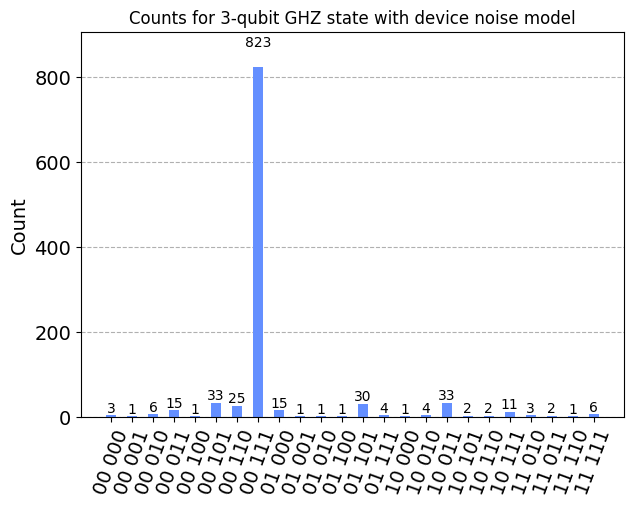

In [43]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

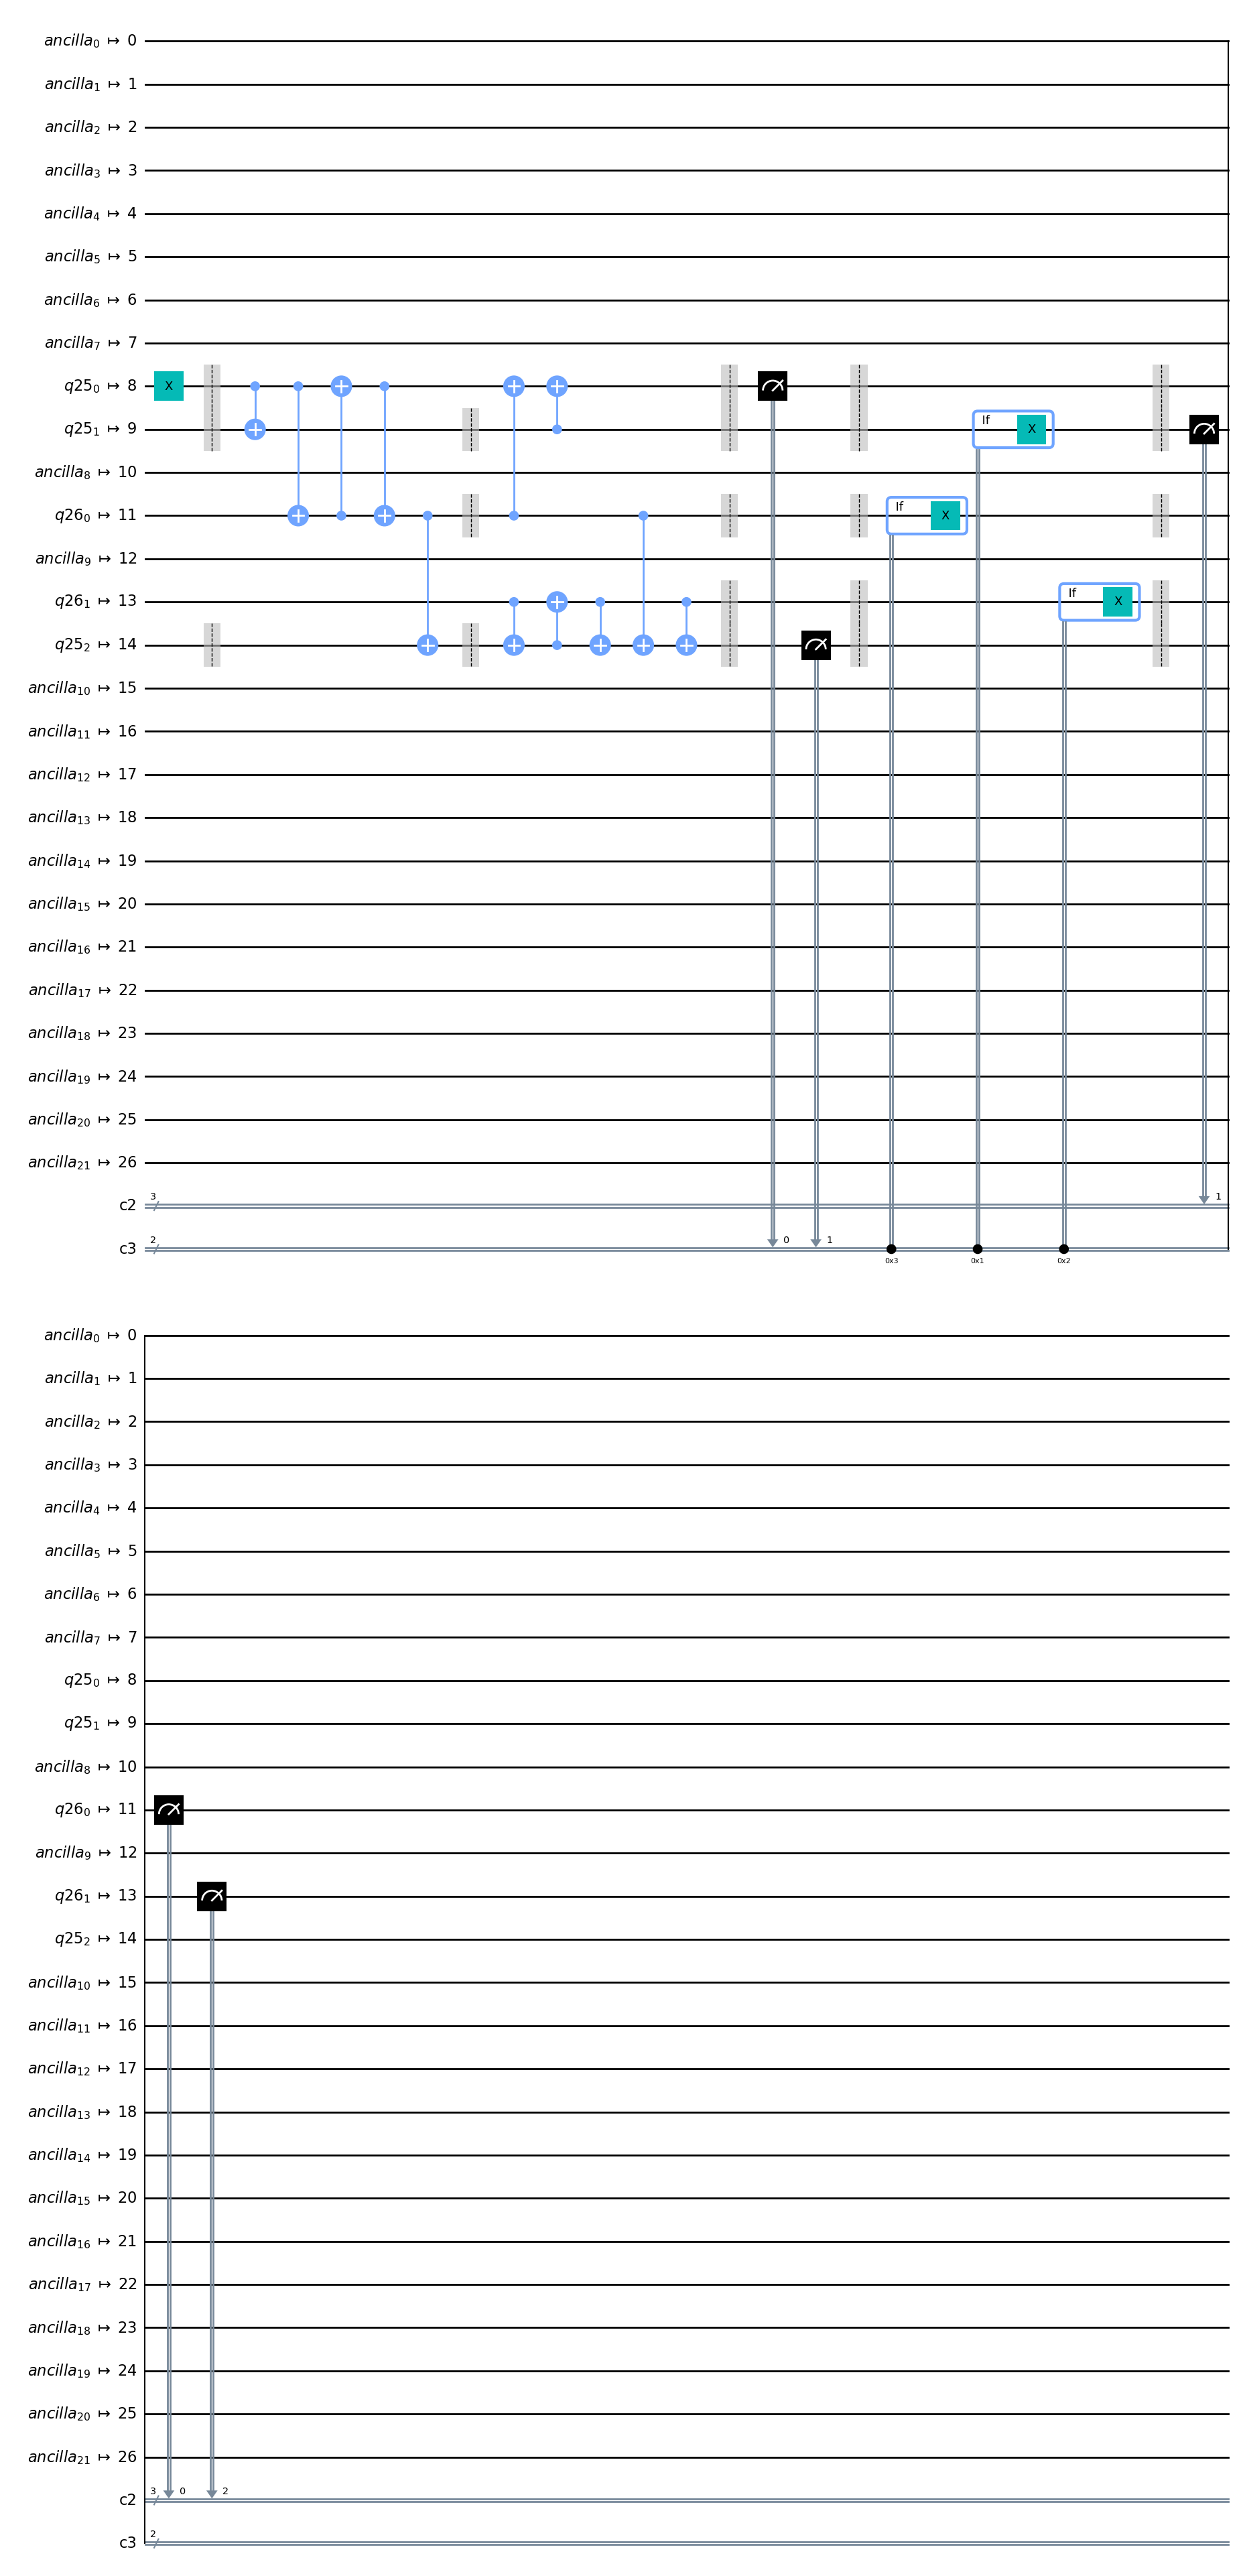

In [44]:
tcirc.draw("mpl")

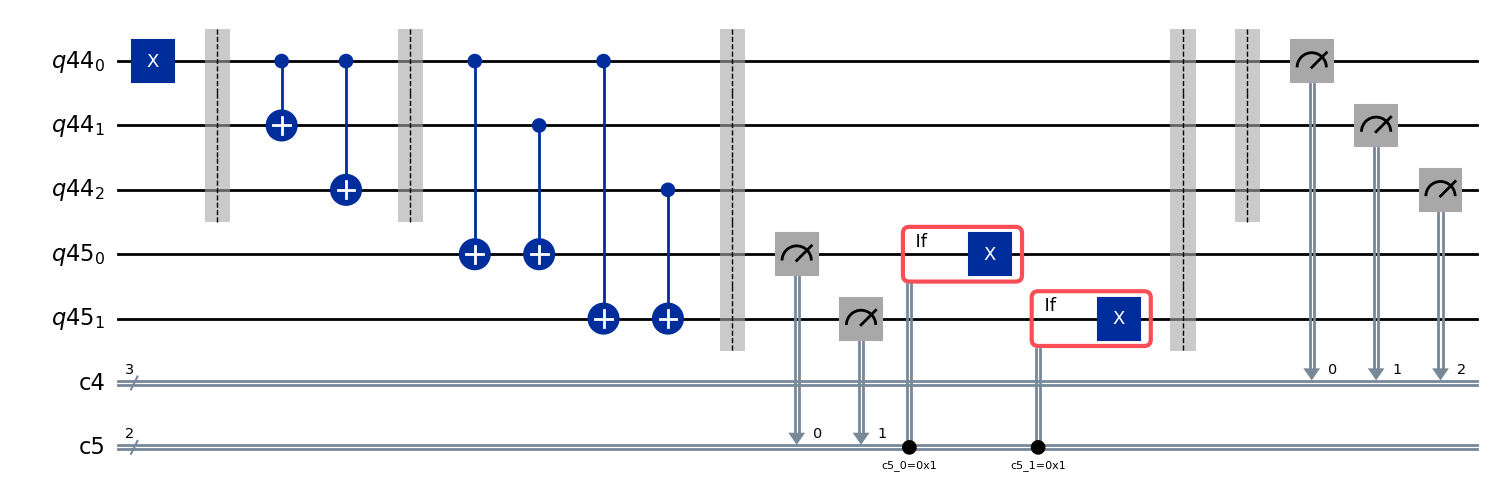

In [45]:
qreg_data = QuantumRegister(3)
qreg_measure = QuantumRegister(2)
creg_data = ClassicalRegister(3)
creg_syndrome = ClassicalRegister(2)
state_data = qreg_data[0]
ancillas_data = qreg_data[1:]

def build_qc():
    """Build a typical error correction circuit"""
    return QuantumCircuit(qreg_data, qreg_measure, creg_data, creg_syndrome)

def initialize_qubits(circuit: QuantumCircuit):
    """Initialize qubit to |1>"""
    circuit.x(qreg_data[0])
    circuit.barrier(qreg_data) # A barrier is a visual indicator of the grouping of a circuit section.
    return circuit

def encode_bit_flip(circuit, state, ancillas) -> QuantumCircuit: # -> is a return value annotation
    """Encode bit-flip. This is done by simply adding a cx"""
    for ancilla in ancillas:
        circuit.cx(state, ancilla)
    circuit.barrier(state, *ancillas)
    return circuit

def measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_measure):
    """
        Measure the syndrome by measuring the parity.
        We reset our ancilla qubits after measuring the stabilizer
        so we can reuse them for repeated stabilizer measurements.
        Because we have already observed the state of the qubit,
        we can write the conditional reset protocol directly to
        avoid another round of qubit measurement if we used
        the `reset` instruction.
    """
    circuit.cx(qreg_data[0], qreg_measure[0])
    circuit.cx(qreg_data[1], qreg_measure[0])
    circuit.cx(qreg_data[0], qreg_measure[1])
    circuit.cx(qreg_data[2], qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure) # * can pass arbitrary number argument
    circuit.measure(qreg_measure, creg_measure)
    with circuit.if_test((creg_syndrome[0], 1)): # reset the ancilla bit
        circuit.x(qreg_measure[0])
    with circuit.if_test((creg_syndrome[1], 1)):
        circuit.x(qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def apply_correction_bit(circuit, qreg_data, creg_syndrome):
    """We can detect where an error occurred and correct our state"""
    with circuit.if_test((creg_syndrome, 3)):
        circuit.x(qreg_data[0])
    with circuit.if_test((creg_syndrome, 1)):
        circuit.x(qreg_data[1])
    with circuit.if_test((creg_syndrome, 2)):
        circuit.x(qreg_data[2])
    circuit.barrier(qreg_data)
    return circuit

def apply_final_readout(circuit, qreg_data, creg_data):
    """Read out the final measurements"""
    circuit.barrier(qreg_data)
    circuit.measure(qreg_data, creg_data)
    return circuit

def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=False)
circuit.draw(output="mpl", style='iqp')

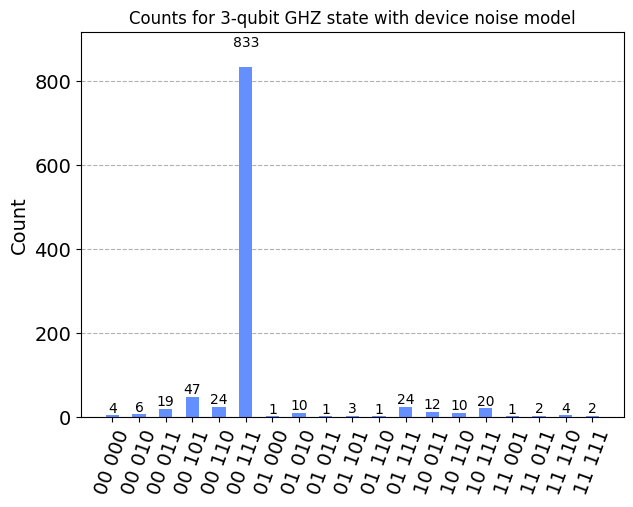

In [46]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

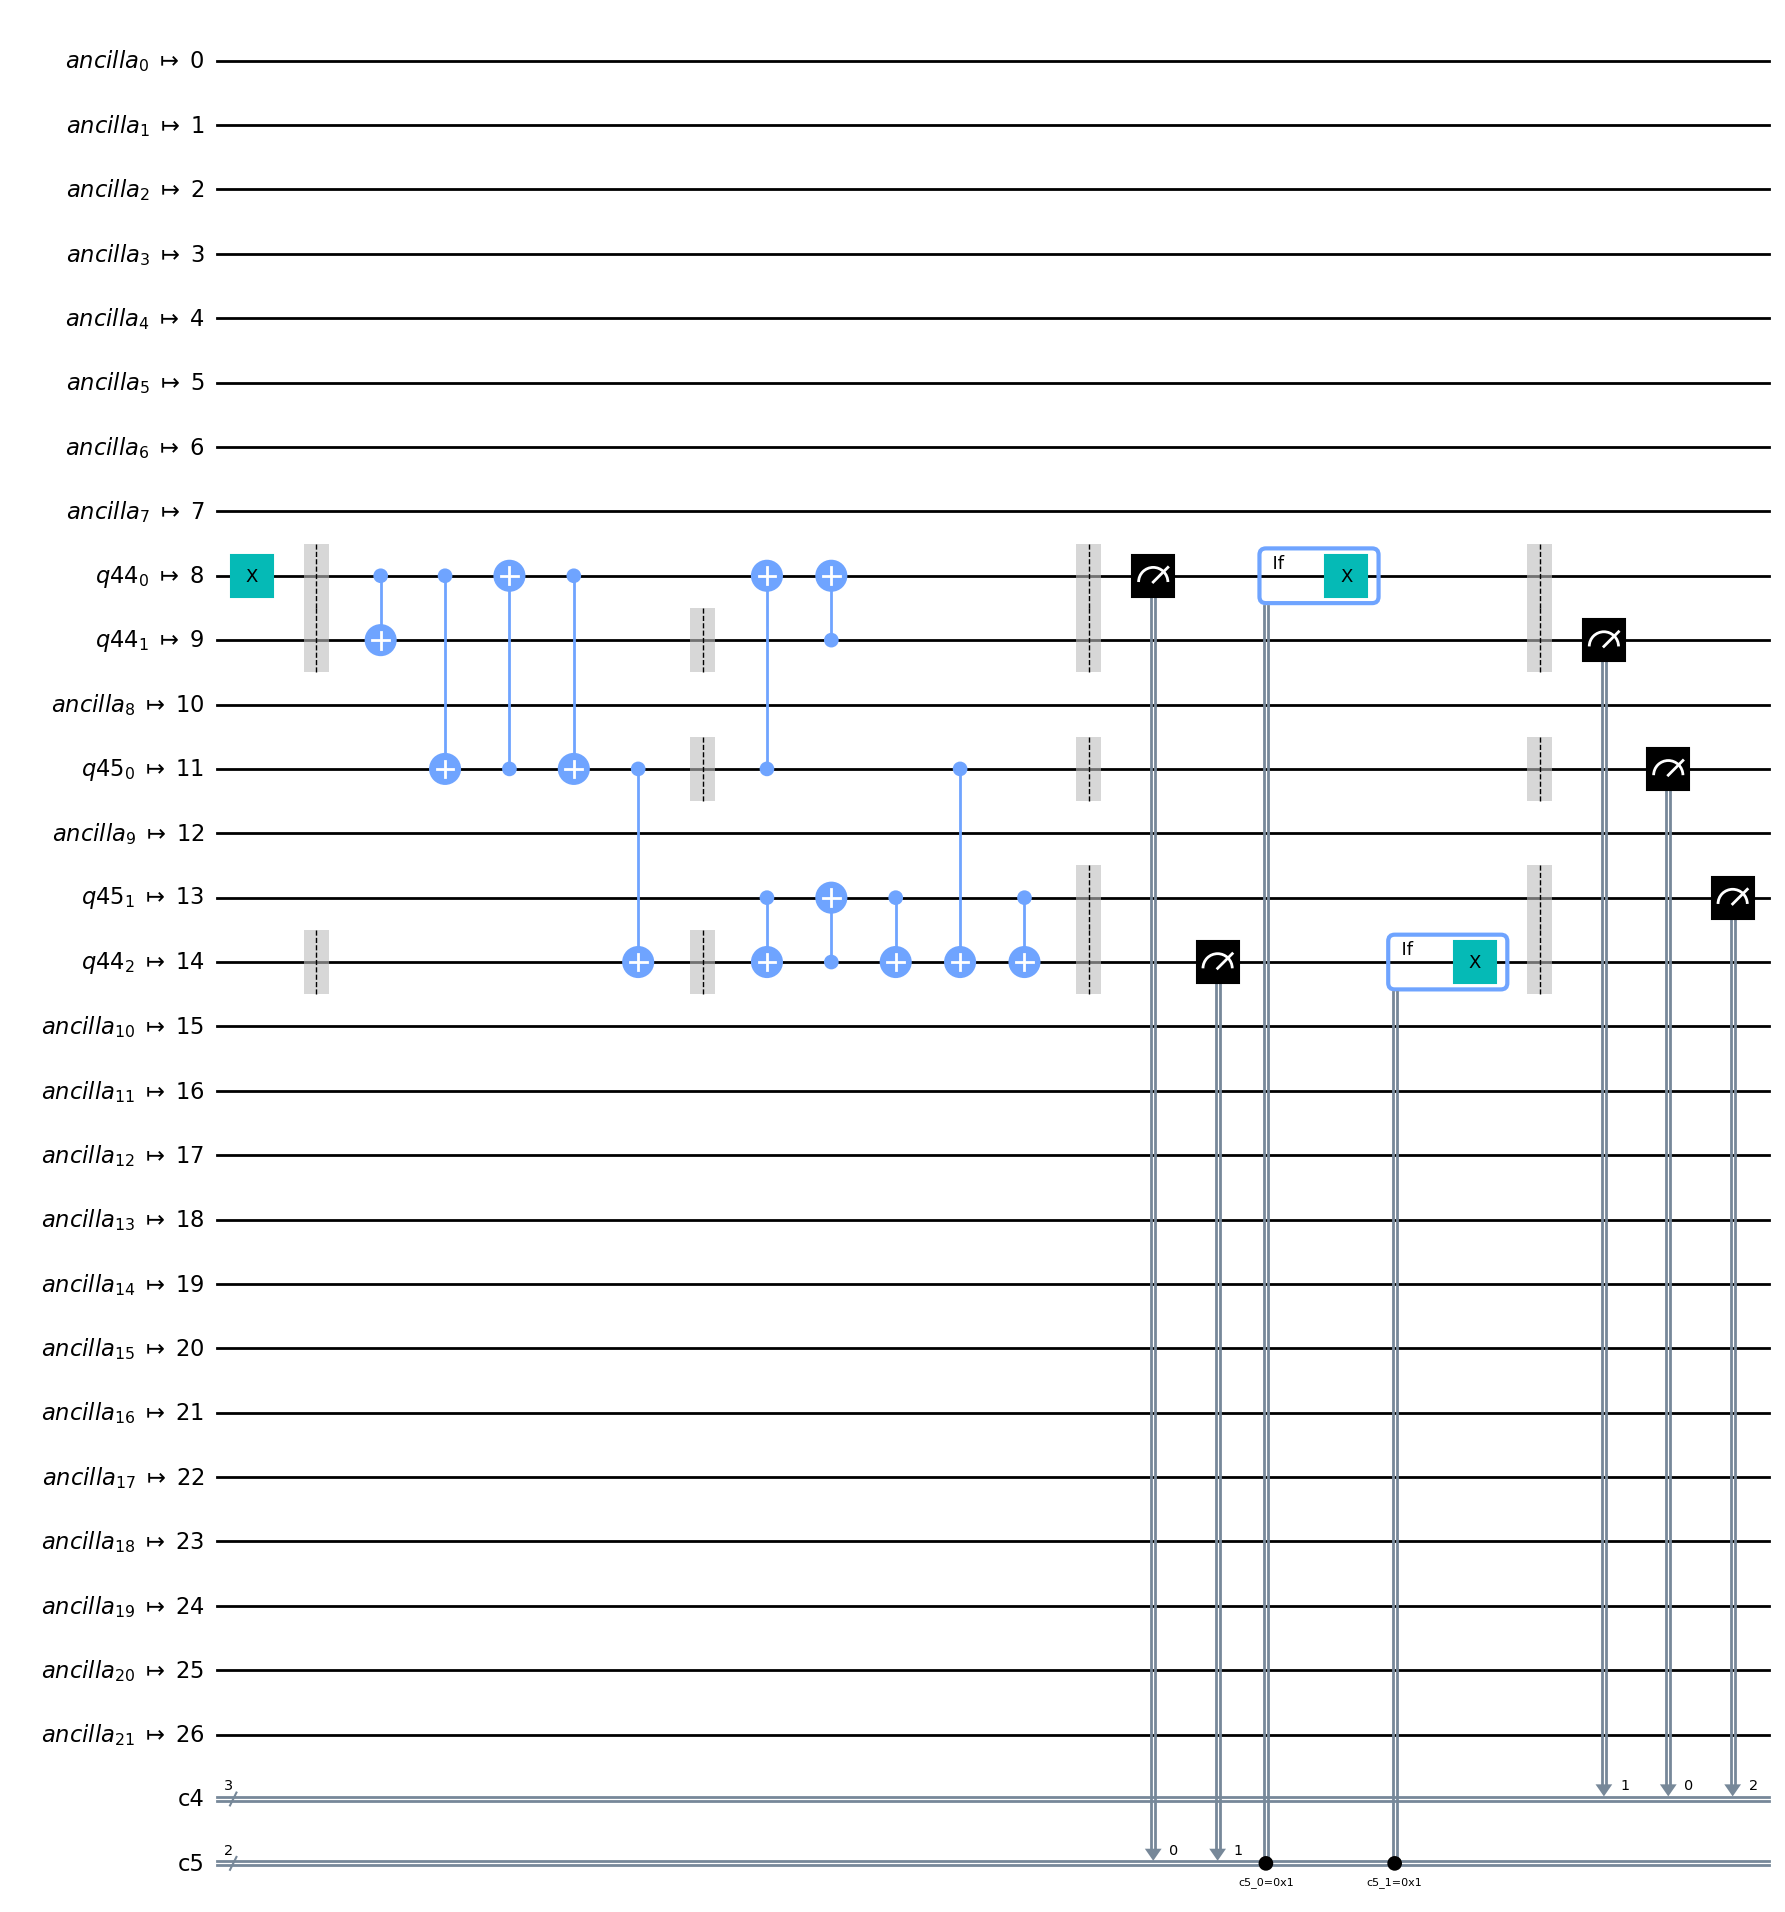

In [47]:
tcirc.draw("mpl")

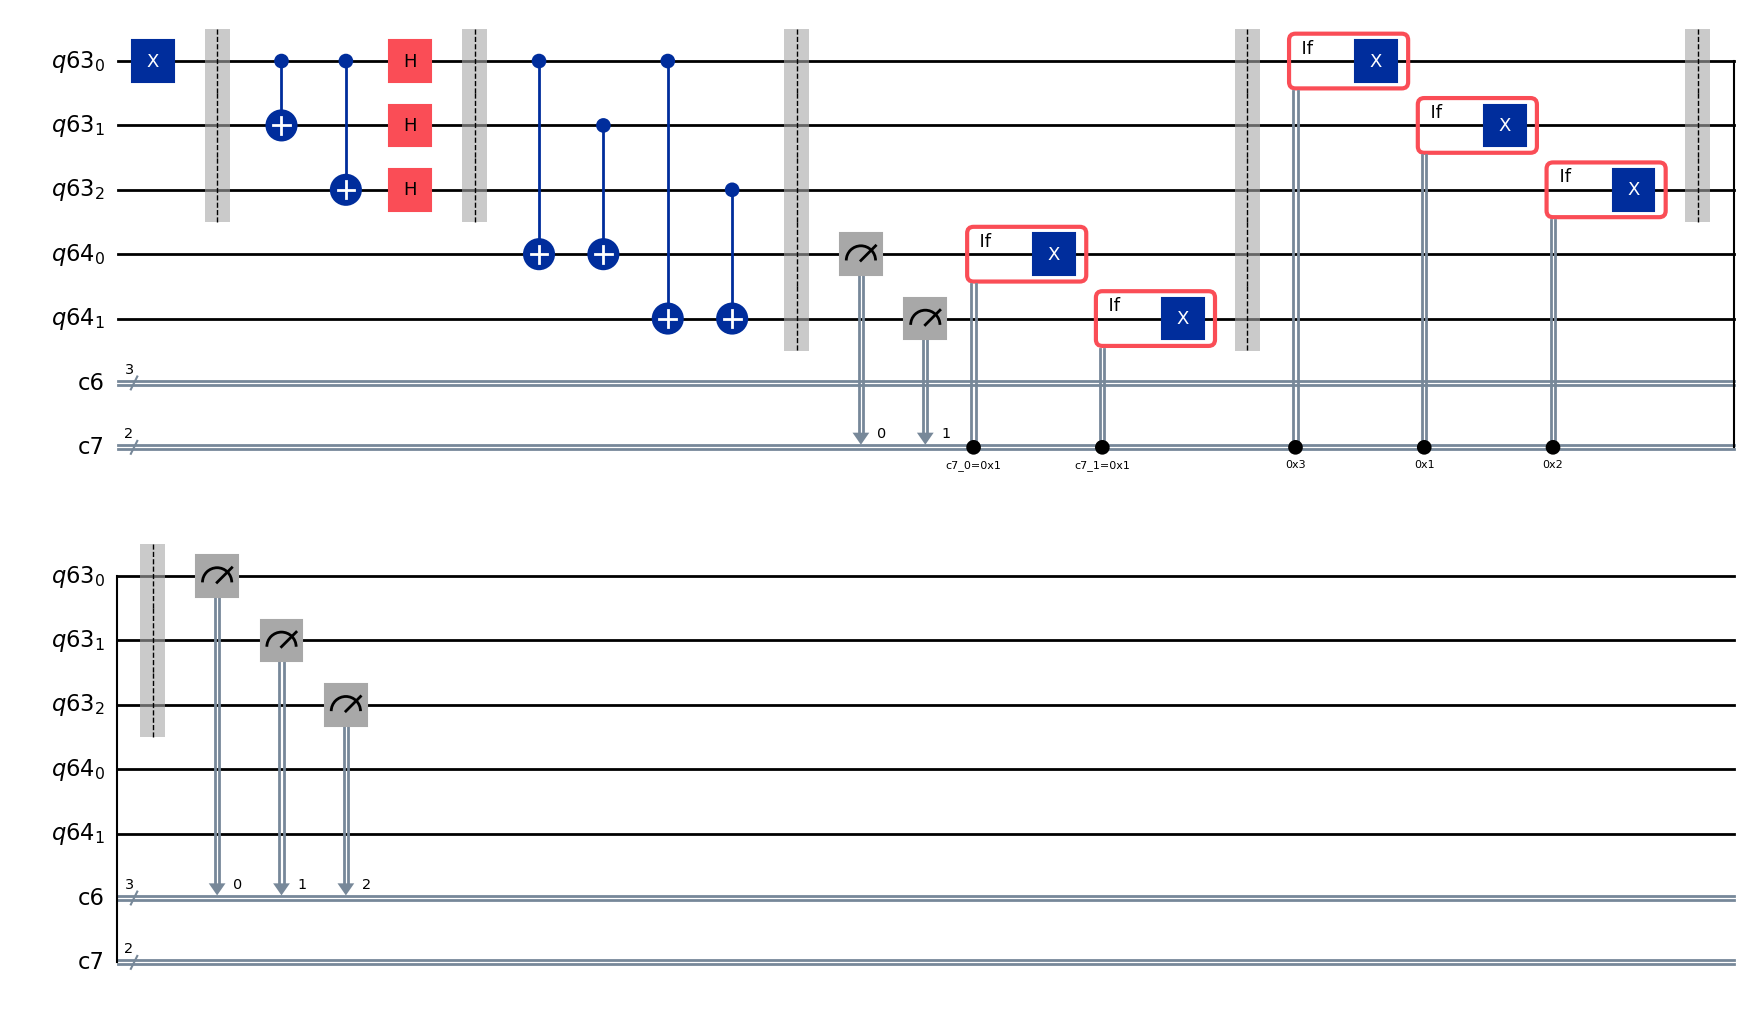

In [48]:
qreg_data = QuantumRegister(3)
qreg_measure = QuantumRegister(2)
creg_data = ClassicalRegister(3)
creg_syndrome = ClassicalRegister(2)
state_data = qreg_data[0]
ancillas_data = qreg_data[1:]

def build_qc():
    """Build a typical error correction circuit"""
    return QuantumCircuit(qreg_data, qreg_measure, creg_data, creg_syndrome)

def initialize_qubits(circuit: QuantumCircuit):
    """Initialize qubit to |1>"""
    circuit.x(qreg_data[0])
    circuit.barrier(qreg_data) # A barrier is a visual indicator of the grouping of a circuit section.
    return circuit

def encode_bit_flip(circuit, state, ancillas) -> QuantumCircuit: # -> is a return value annotation
    """Encode bit-flip. This is done by simply adding a cx"""
    for ancilla in ancillas:
        circuit.cx(state, ancilla)
    circuit.h(qreg_data[0])
    circuit.h(qreg_data[1])
    circuit.h(qreg_data[2])

    circuit.barrier(state, *ancillas)
    return circuit

def measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_measure):
    """
        Measure the syndrome by measuring the parity.
        We reset our ancilla qubits after measuring the stabilizer
        so we can reuse them for repeated stabilizer measurements.
        Because we have already observed the state of the qubit,
        we can write the conditional reset protocol directly to
        avoid another round of qubit measurement if we used
        the `reset` instruction.
    """
    circuit.cx(qreg_data[0], qreg_measure[0])
    circuit.cx(qreg_data[1], qreg_measure[0])
    circuit.cx(qreg_data[0], qreg_measure[1])
    circuit.cx(qreg_data[2], qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure) # * can pass arbitrary number argument
    circuit.measure(qreg_measure, creg_measure)
    with circuit.if_test((creg_syndrome[0], 1)): # reset the ancilla bit
        circuit.x(qreg_measure[0])
    with circuit.if_test((creg_syndrome[1], 1)):
        circuit.x(qreg_measure[1])
    circuit.barrier(*qreg_data, *qreg_measure)
    return circuit

def apply_correction_bit(circuit, qreg_data, creg_syndrome):
    """We can detect where an error occurred and correct our state"""
    with circuit.if_test((creg_syndrome, 3)):
        circuit.x(qreg_data[0])
    with circuit.if_test((creg_syndrome, 1)):
        circuit.x(qreg_data[1])
    with circuit.if_test((creg_syndrome, 2)):
        circuit.x(qreg_data[2])
    circuit.barrier(qreg_data)
    return circuit

def apply_final_readout(circuit, qreg_data, creg_data):
    """Read out the final measurements"""
    circuit.barrier(qreg_data)
    circuit.measure(qreg_data, creg_data)
    return circuit

def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=True)
circuit.draw(output="mpl", style='iqp')

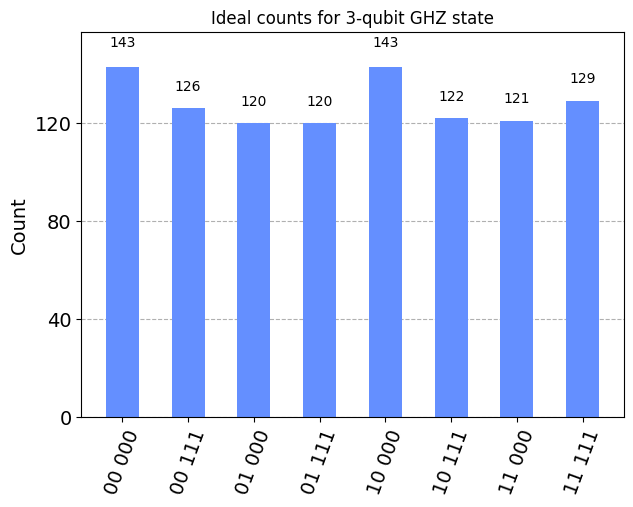

In [49]:
from qiskit.providers.fake_provider import FakeVigo
from qiskit_aer import AerSimulator

# ideal
sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circuit, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

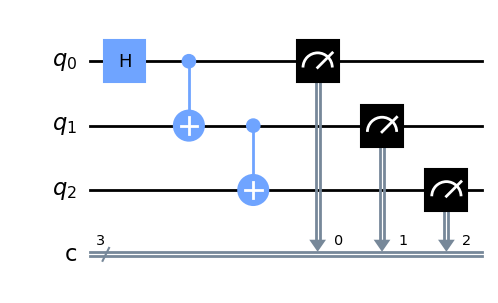

In [50]:
circ.draw("mpl")

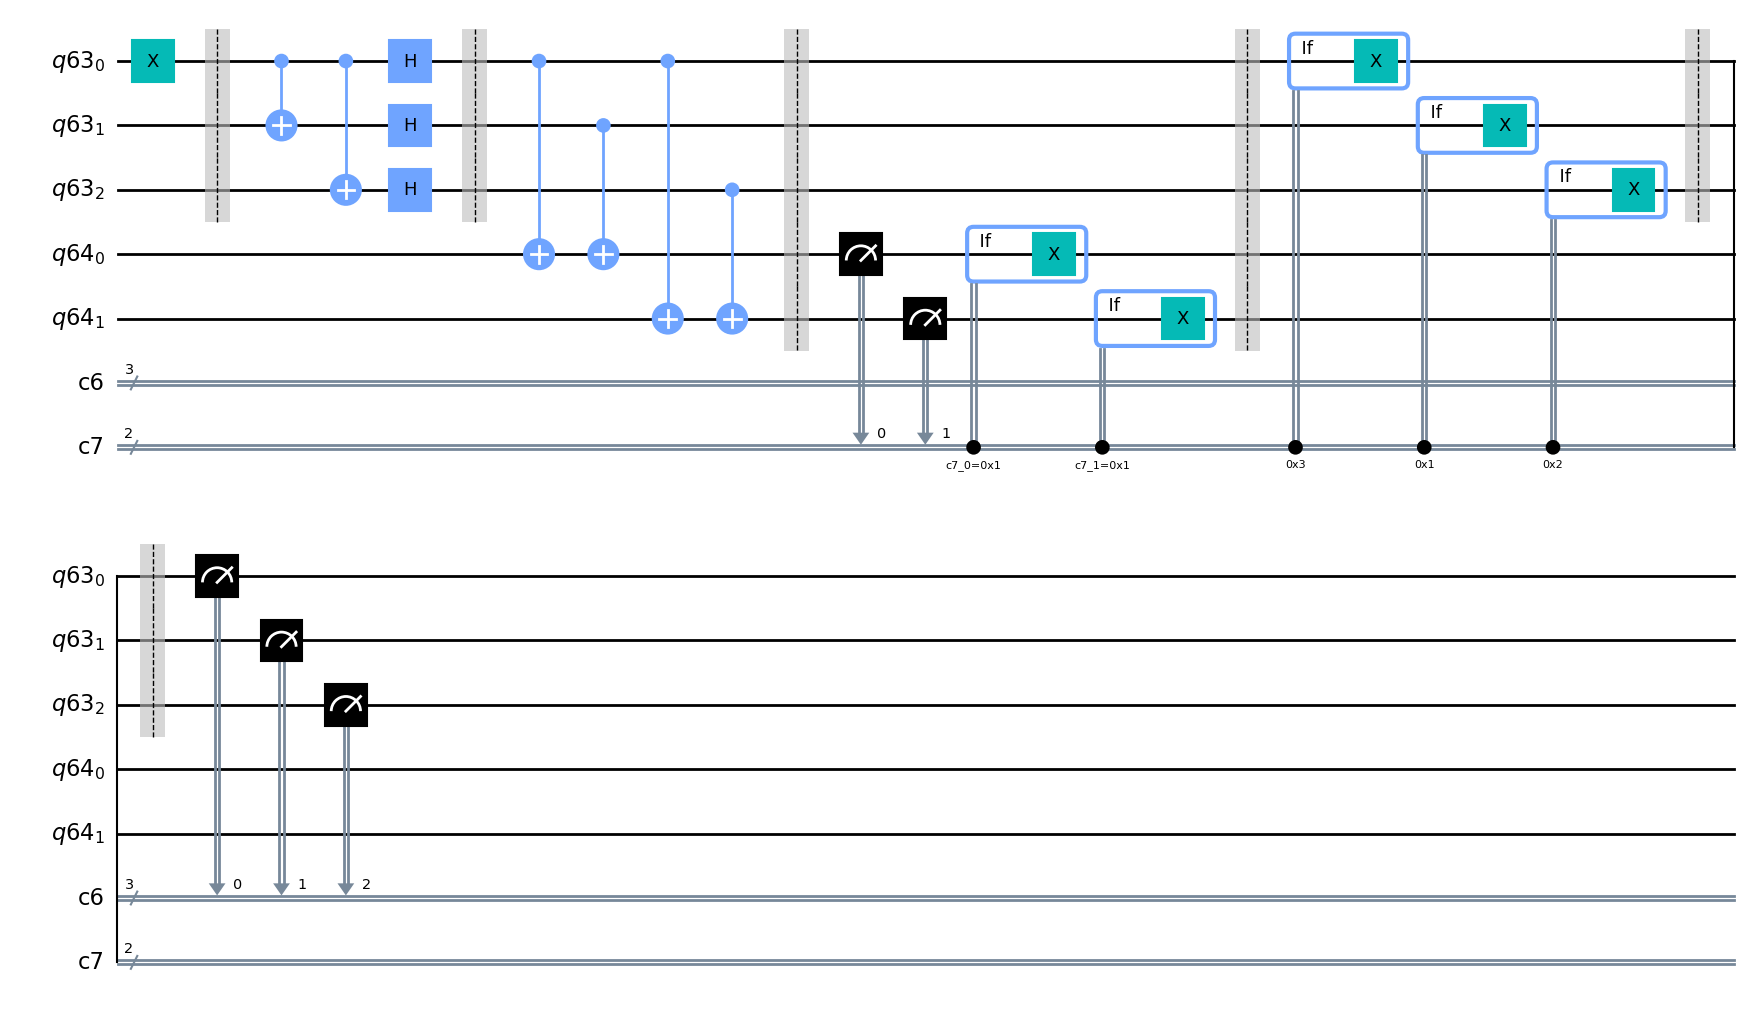

In [51]:
circuit.draw("mpl")

Counts(ideal): {'111': 519, '000': 505}


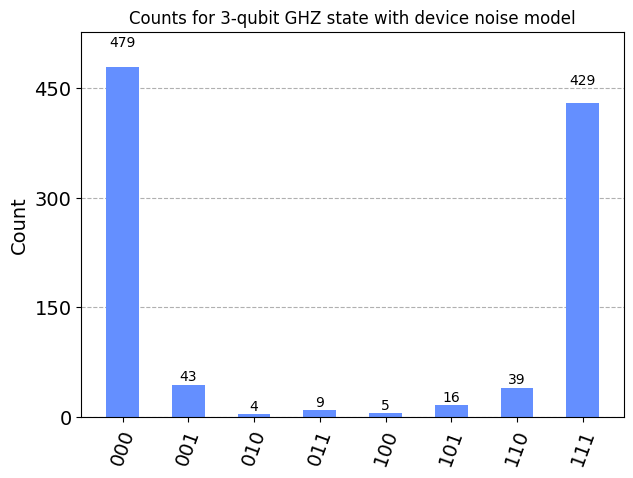

In [52]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error)

import qiskit
from qiskit_aer import AerSimulator

###########

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = qiskit.execute(circ, aersim).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)
# Counts(ideal): {'000': 493, '111': 531}

# circ.draw(output="mpl", style='iqp')
circ.draw("mpl")

from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

from qiskit.providers.fake_provider import FakeVigo
device_backend = FakeVigo()

# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

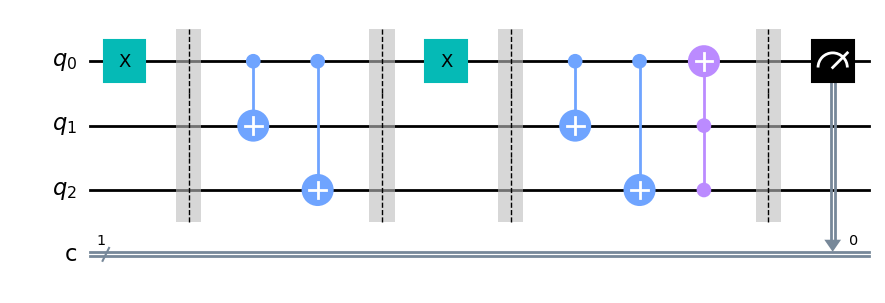

In [118]:
# has correction
circ = QuantumCircuit(3, 1)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)

circ.barrier(0,1,2)
circ.x(0)

circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.ccx(1,2,0)
circ.barrier(0,1,2)
circ.measure([0], [0])
# circ.draw(output="mpl").savefig("Circuit Bit Flip Code (no syn).svg")
circ.draw(output="mpl")

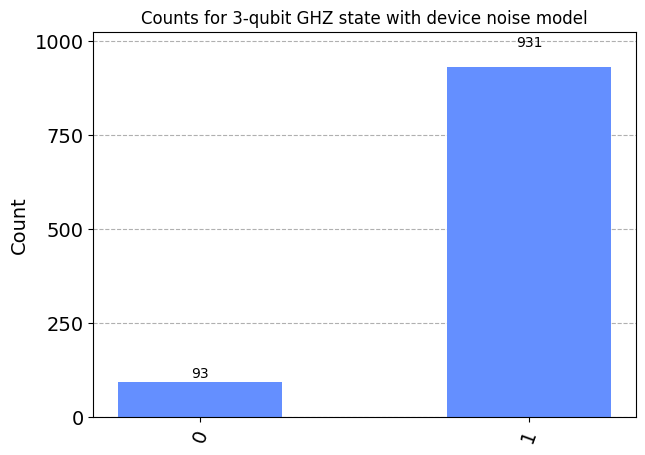

In [54]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_sydney = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_sydney)

# Execute noisy simulation and get counts
result_noise = sim_sydney.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

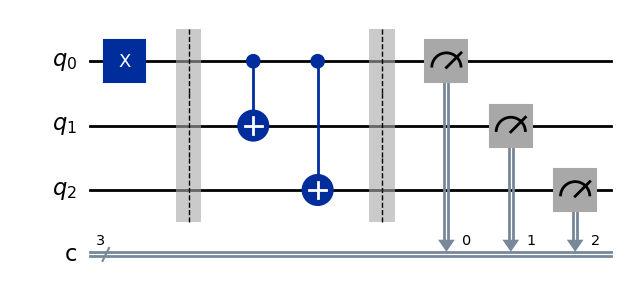

In [55]:
# without decoding
circ = QuantumCircuit(3, 3)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
circ.barrier(0,1,2)
circ.measure([0,1,2], [0,1,2])
circ.draw(output="mpl", style='iqp')

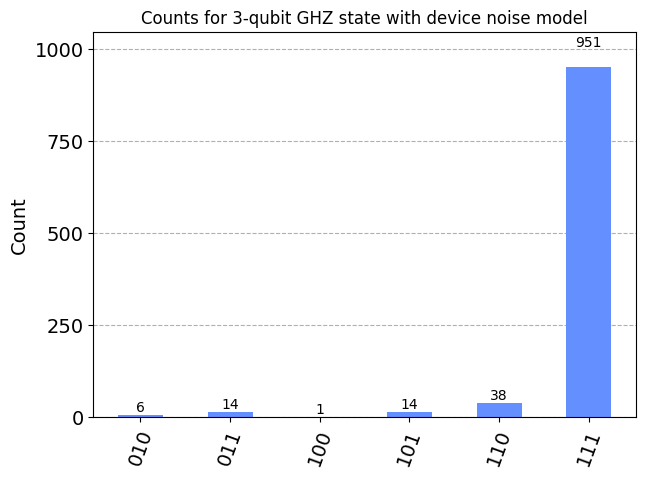

In [56]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

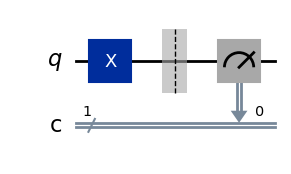

In [57]:
# without encoding and decoding
circ = QuantumCircuit(1, 1)
circ.x(0)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
circ.barrier(0)
circ.measure([0], [0])
circ.draw(output="mpl", style='iqp')

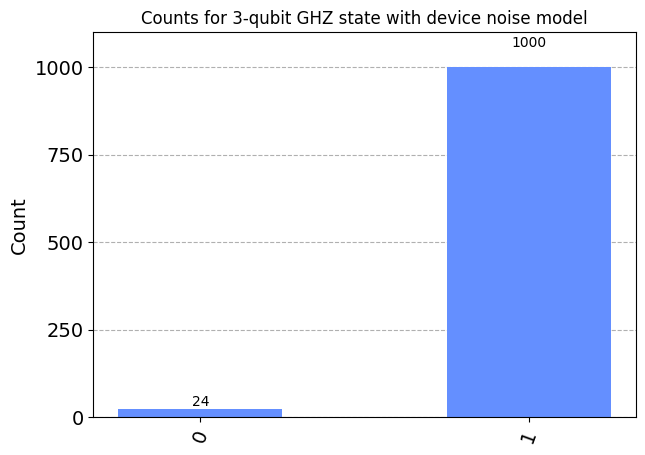

In [58]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

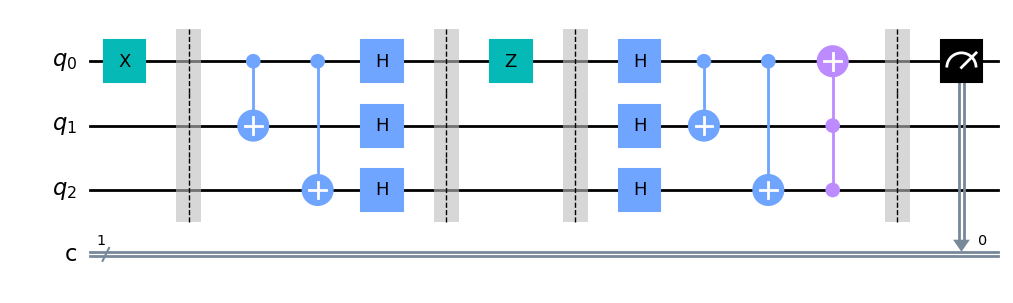

In [97]:
# has correction
circ = QuantumCircuit(3, 1)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier(0,1,2)
circ.z(0)
circ.barrier(0,1,2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.ccx(1,2,0)
circ.barrier(0,1,2)
circ.measure([0], [0])
# circ.draw(output="mpl").savefig("Circuit: Phase Flip Code (no syn).svg")
circ.draw(output="mpl")

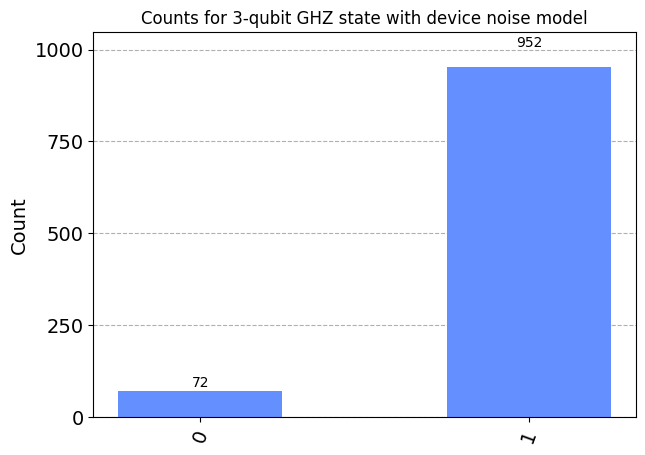

In [60]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

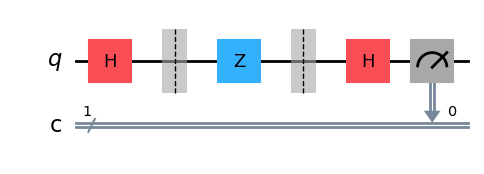

In [61]:
# without encoding and decoding
import numpy as np

circ = QuantumCircuit(1, 1)
# circ.rx(np.pi/4,0)
circ.h(0)
circ.barrier(0)
circ.z(0)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
circ.barrier(0)
circ.h(0)
circ.measure([0], [0])
circ.draw(output="mpl", style='iqp')

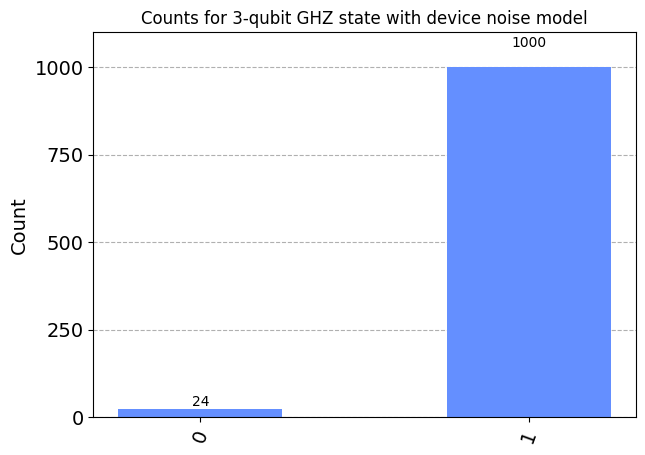

In [62]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

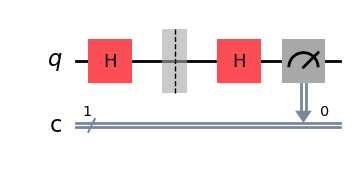

In [63]:
# without encoding and decoding
import numpy as np

circ = QuantumCircuit(1, 1)
# circ.rx(np.pi/4,0)
circ.h(0)
# circ.barrier(0)
# circ.z(0)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.barrier(0,1,2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
circ.barrier(0)
circ.h(0)
circ.measure([0], [0])
circ.draw(output="mpl", style='iqp')

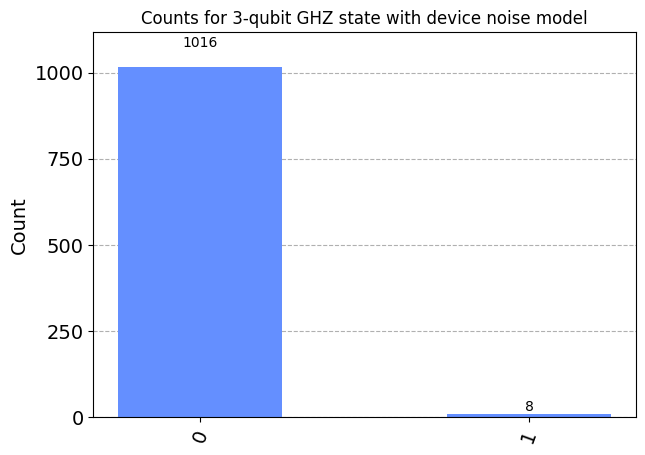

In [64]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")

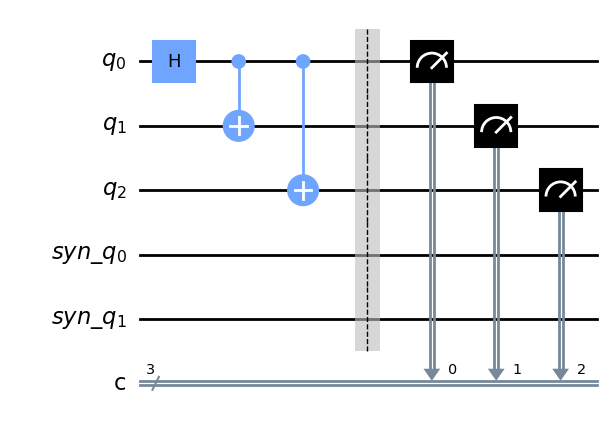

In [237]:
def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    # circuit = build_qc()
    circuit = QuantumCircuit(qreg_data, qreg_measure, creg_data)
    # circuit = initialize_qubits(circuit)
    circuit.h(qreg_data[0])
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    # circuit.x(qreg_data[0])
    # circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    # if apply_correction:
    #     circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=True)
# circuit.draw(output="mpl", style='iqp')
circuit.draw(output="mpl").savefig("Circuit: Bit Flip Code_encoding.svg")
circuit.draw(output="mpl")

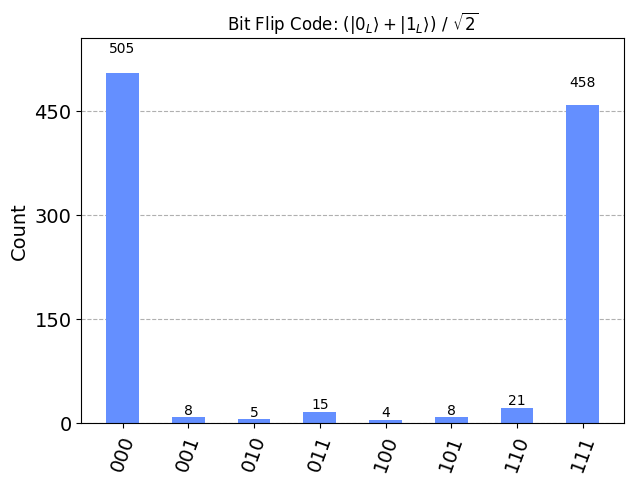

In [153]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
# plot_histogram(counts_noise, title=r"Bit Flip Code: $(|0_L\rangle + |1_L\rangle)\ /\ \sqrt {2}$").savefig("Bit Flip Code_encoding.svg")
plot_histogram(counts_noise, title=r"Bit Flip Code: $(|0_L\rangle + |1_L\rangle)\ /\ \sqrt {2}$")

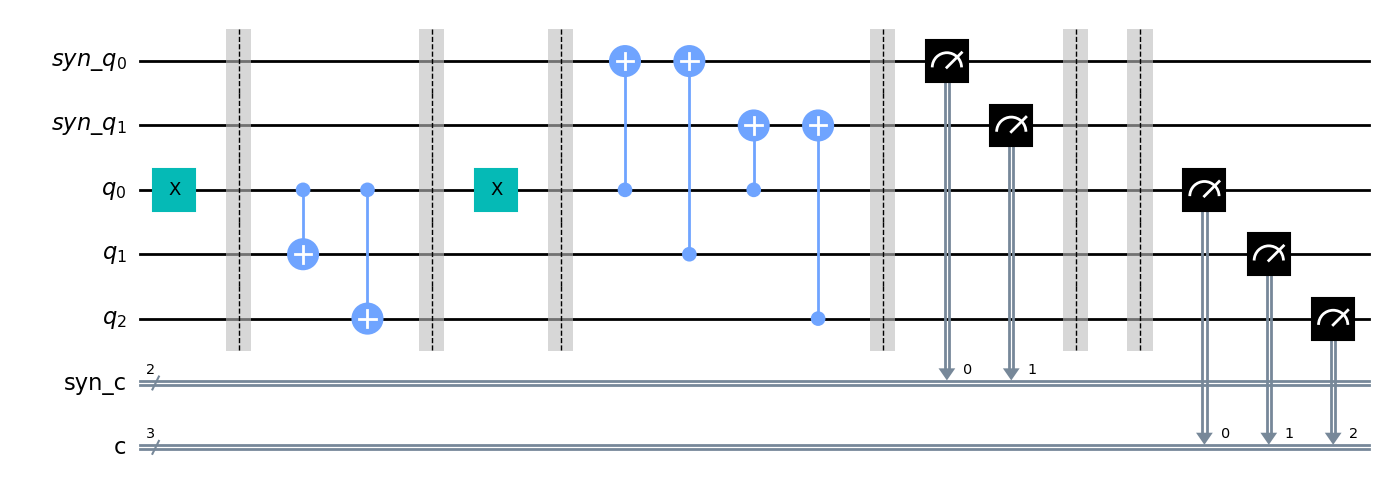

In [229]:
def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit.x(qreg_data[0])
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)
    circuit.barrier(*qreg_data, *qreg_measure)
    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=False)
# circuit.draw(output="mpl", style='iqp')
circuit.draw(output="mpl").savefig("Circuit: Bit Flip Code_Correctable Fault no Correction.svg")
circuit.draw(output="mpl")

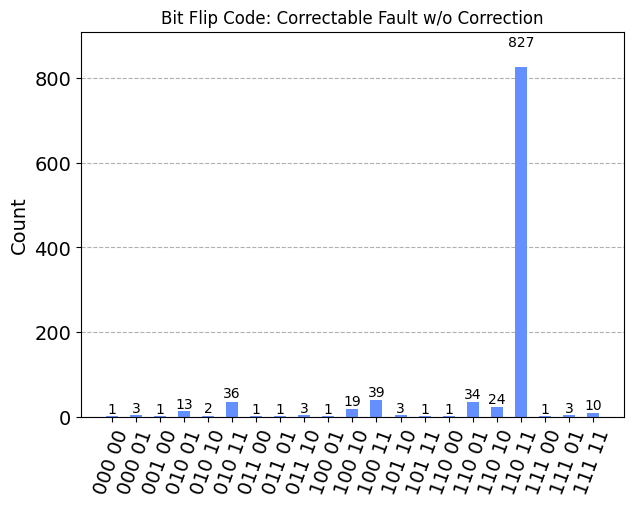

In [224]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Bit Flip Code: Correctable Fault w/o Correction").savefig("Bit Flip Code_Correctable Fault no Correction.svg", bbox_inches='tight')
plot_histogram(counts_noise, title="Bit Flip Code: Correctable Fault w/o Correction")

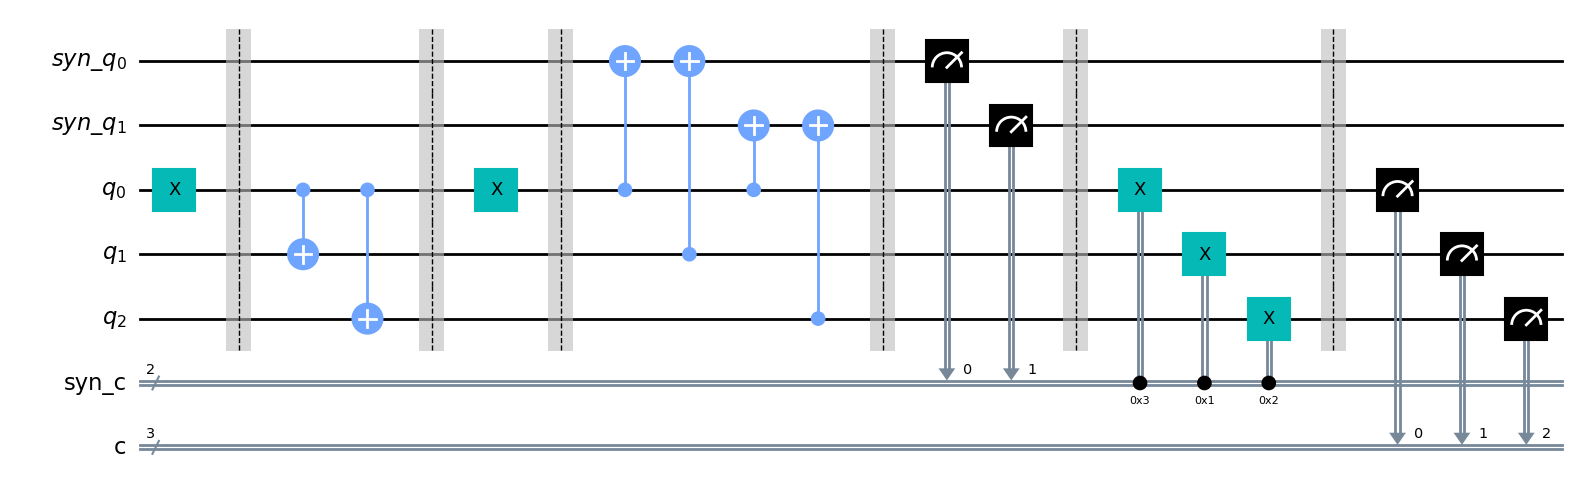

In [230]:
def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit.x(qreg_data[0])
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=True)
# circuit.draw(output="mpl", style='iqp')
circuit.draw(output="mpl").savefig("Circuit: Bit Flip Code_Correctable Fault w Correction.svg")
circuit.draw(output="mpl")

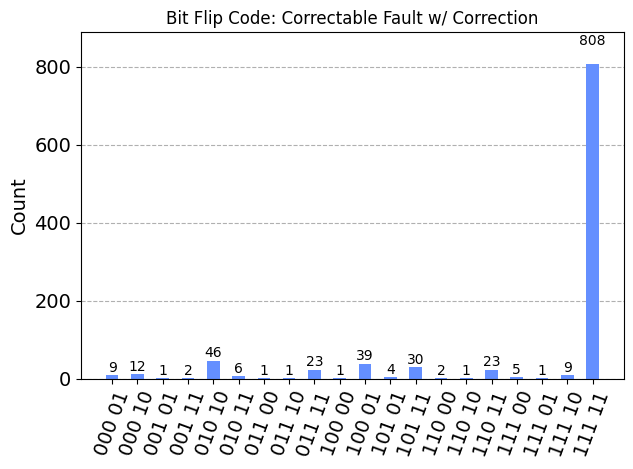

In [226]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, figsize=(7, 4.5), title="Bit Flip Code: Correctable Fault w/ Correction").savefig("Bit Flip Correctable Fault w Correction.svg", bbox_inches='tight')
plot_histogram(counts_noise,figsize=(7, 4.5), title="Bit Flip Code: Correctable Fault w/ Correction")

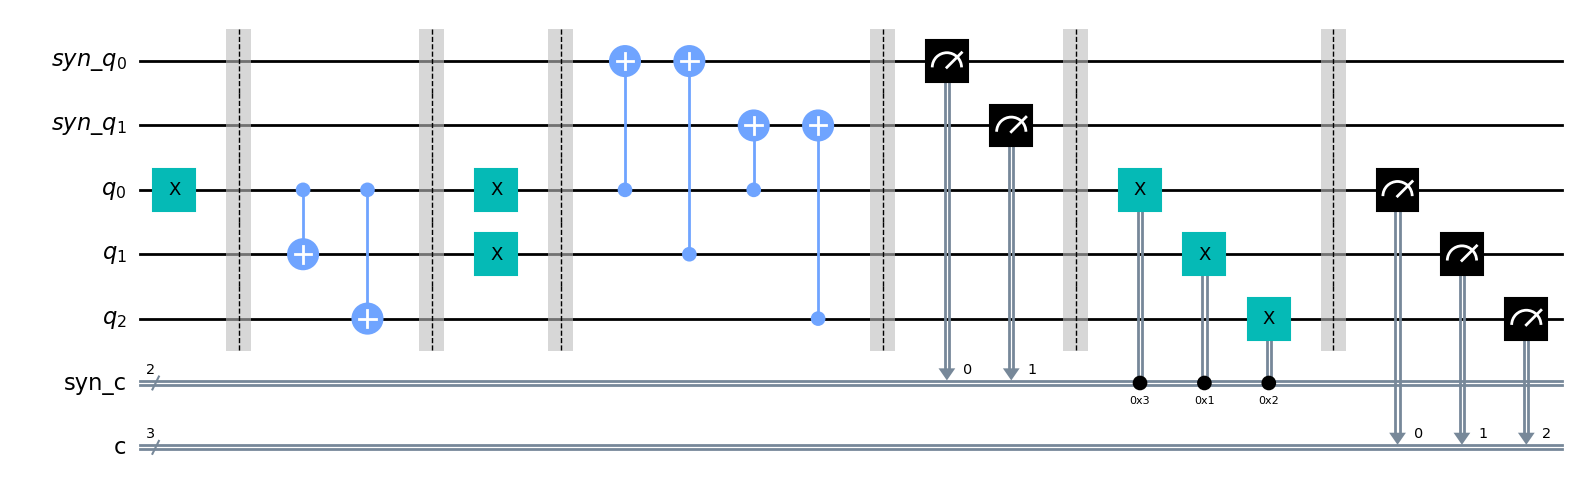

In [231]:
def build_error_correction_sequence(apply_correction: bool) -> QuantumCircuit:

    circuit = build_qc()
    circuit = initialize_qubits(circuit)
    circuit = encode_bit_flip(circuit, state_data, ancillas_data)
    circuit.x(qreg_data[0])
    circuit.x(qreg_data[1])
    circuit = measure_syndrome_bit(circuit, qreg_data, qreg_measure, creg_syndrome)

    if apply_correction:
        circuit = apply_correction_bit(circuit, qreg_data, creg_syndrome)

    circuit = apply_final_readout(circuit,  qreg_data, creg_data)
    return circuit

circuit = build_error_correction_sequence(apply_correction=True)
# circuit.draw(output="mpl", style='iqp')
circuit.draw(output="mpl").savefig("Circuit: Bit Flip Code_Non-correctable Fault w Correction.svg")
circuit.draw(output="mpl")

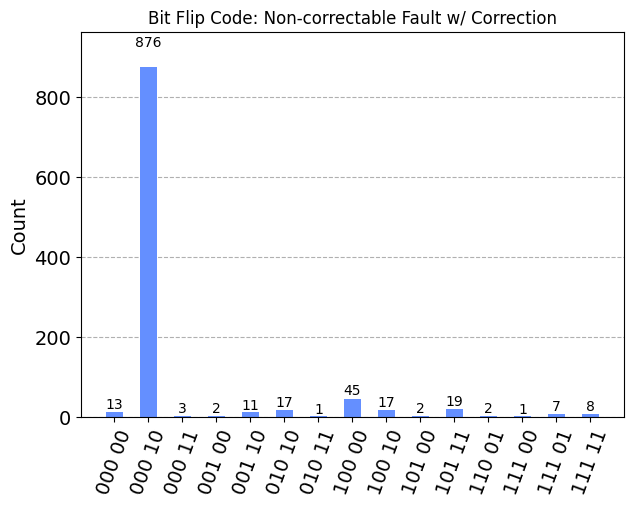

In [228]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circuit, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Bit Flip Code: Non-correctable Fault w/ Correction").savefig("Bit Flip Non-correctable Fault w Correction.svg", bbox_inches='tight')
plot_histogram(counts_noise, title="Bit Flip Code: Non-correctable Fault w/ Correction")


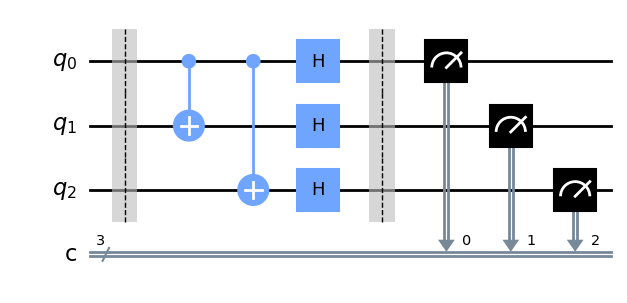

In [232]:
# has correction
circ = QuantumCircuit(3, 3)
# circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier(0,1,2)
# circ.z(0)
# circ.barrier(0,1,2)
# circ.h(0)
# circ.h(1)
# circ.h(2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
# circ.barrier(0,1,2)
circ.measure([0,1,2], [0,1,2])
circ.draw(output="mpl").savefig("Circuit: Phase Flip Code (no syn)_encoding_0.svg")
circ.draw(output="mpl")

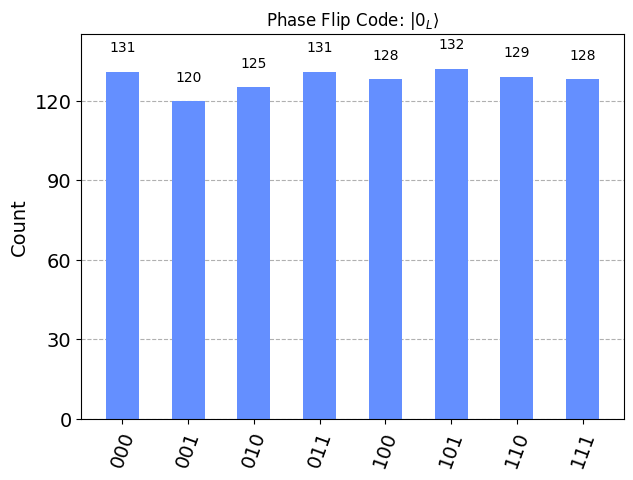

In [185]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
# plot_histogram(counts_noise, title=r"Phase Flip Code: $|0_L\rangle$").savefig("Phase Flip Code_encoding_0.svg")
plot_histogram(counts_noise, title=r"Phase Flip Code: $|0_L\rangle$")

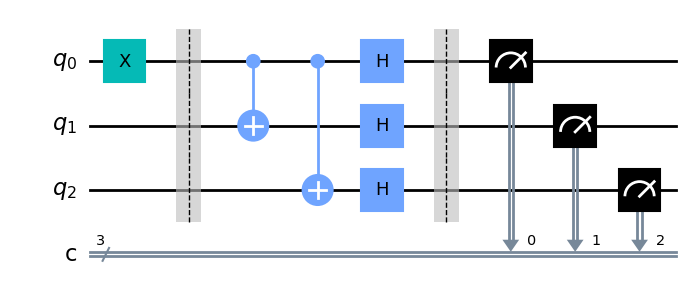

In [233]:
# has correction
circ = QuantumCircuit(3, 3)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier(0,1,2)
# circ.z(0)
# circ.barrier(0,1,2)
# circ.h(0)
# circ.h(1)
# circ.h(2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
# circ.barrier(0,1,2)
circ.measure([0,1,2], [0,1,2])
circ.draw(output="mpl").savefig("Circuit: Phase Flip Code (no syn)_encoding_1.svg")
circ.draw(output="mpl")

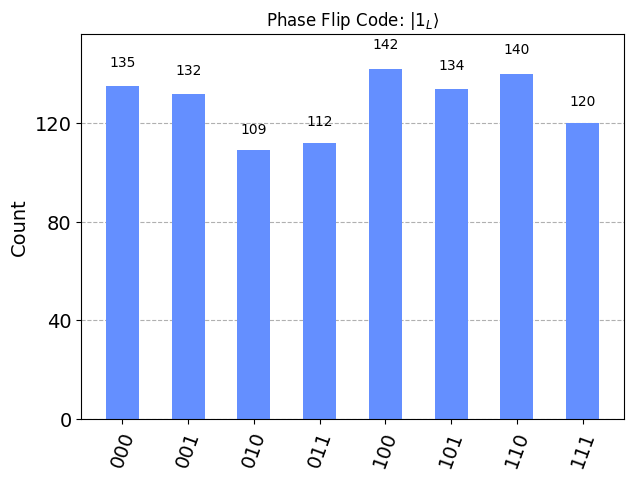

In [189]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title=r"Phase Flip Code: $|1_L\rangle$").savefig("Phase Flip Code_encoding_1.svg")
plot_histogram(counts_noise, title=r"Phase Flip Code: $|1_L\rangle$")

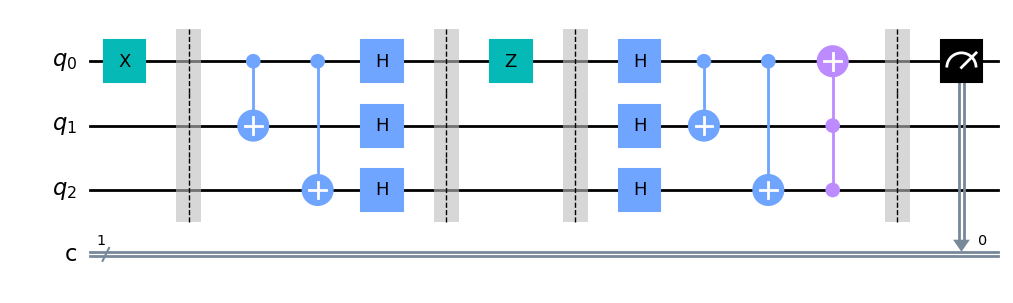

In [234]:
# has correction
circ = QuantumCircuit(3, 1)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier(0,1,2)
circ.z(0)
circ.barrier(0,1,2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.ccx(1,2,0)
circ.barrier(0,1,2)
circ.measure([0], [0])
circ.draw(output="mpl").savefig("Circuit: Phase Flip Code (no syn)_Correctable Fault w Correction.svg")
circ.draw(output="mpl")

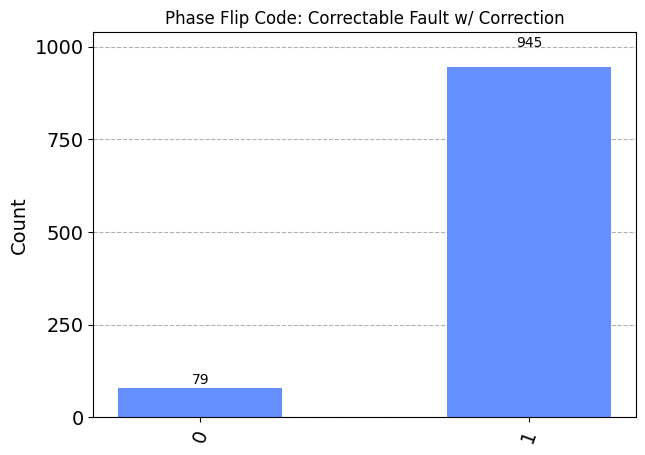

In [191]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Phase Flip Code: Correctable Fault w/ Correction").savefig("Phase Flip Code: Correctable Fault w Correction.svg")
plot_histogram(counts_noise, title="Phase Flip Code: Correctable Fault w/ Correction")

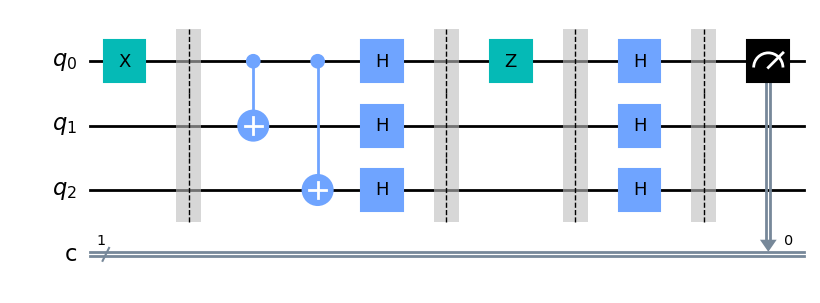

In [235]:
# has correction
circ = QuantumCircuit(3, 1)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier(0,1,2)
circ.z(0)
circ.barrier(0,1,2)
circ.h(0)
circ.h(1)
circ.h(2)
# circ.cx(0, 1)
# circ.cx(0, 2)
# circ.ccx(1,2,0)
circ.barrier(0,1,2)
circ.measure([0], [0])
circ.draw(output="mpl").savefig("Circuit: Phase Flip Code (no syn)_Correctable Fault no Correction.svg")
circ.draw(output="mpl")

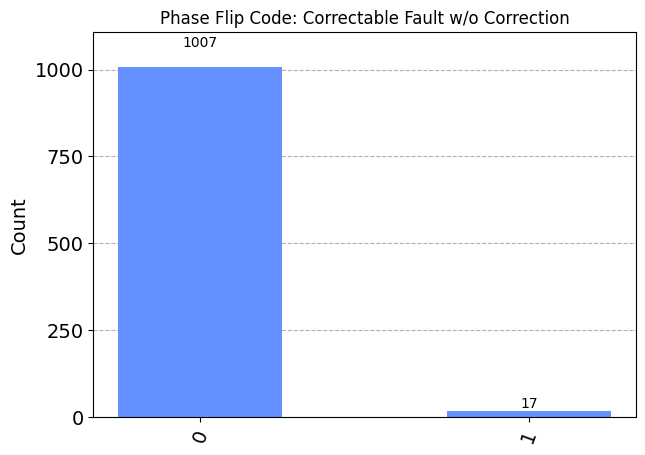

In [199]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Phase Flip Code: Correctable Fault w/o Correction").savefig("Phase Flip Code: Correctable Fault no Correction.svg")
plot_histogram(counts_noise, title="Phase Flip Code: Correctable Fault w/o Correction")

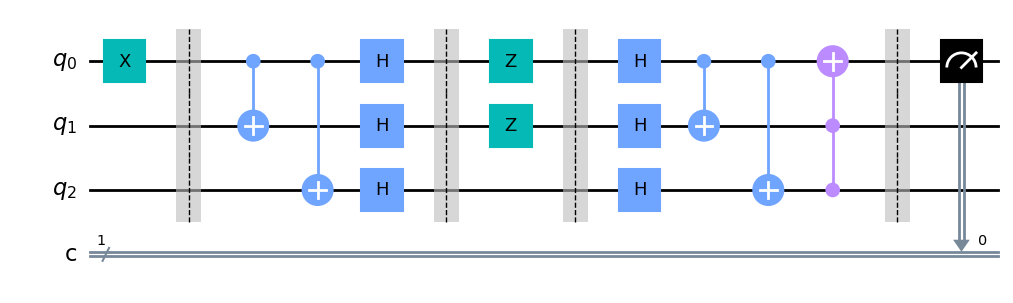

In [236]:
# has correction
circ = QuantumCircuit(3, 1)
circ.x(0)
circ.barrier(0,1,2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.barrier(0,1,2)
circ.z(0)
circ.z(1)
circ.barrier(0,1,2)
circ.h(0)
circ.h(1)
circ.h(2)
circ.cx(0, 1)
circ.cx(0, 2)
circ.ccx(1,2,0)
circ.barrier(0,1,2)
circ.measure([0], [0])
circ.draw(output="mpl").savefig("Circuit: Phase Flip Code (no syn)_Non-correctable Fault w Correction.svg")
circ.draw(output="mpl")

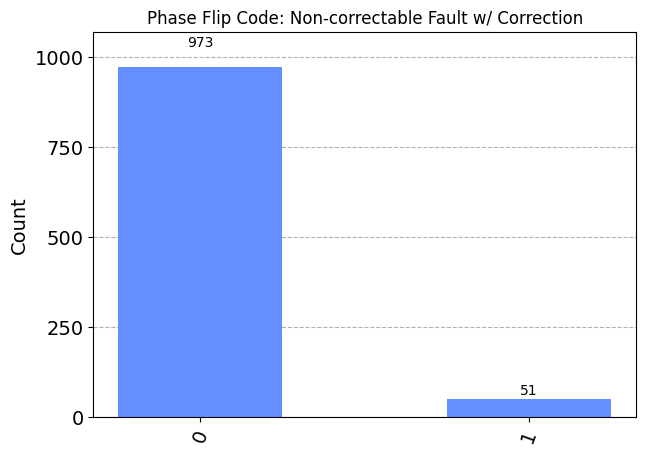

In [205]:
from qiskit.providers.fake_provider import FakeSydney
from qiskit_aer import AerSimulator

device_backend = FakeSydney()
sim_vigo = AerSimulator.from_backend(device_backend)
# sim_vigo = AerSimulator()

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Phase Flip Code: Non-correctable Fault w/ Correction").savefig("Phase Flip Code: Non-correctable Fault w Correction.svg")
plot_histogram(counts_noise, title="Phase Flip Code: Non-correctable Fault w/ Correction")